In [190]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader as api

# 加载数据集
color_names_dataset = pd.read_csv('../settings/color_names.csv')
print(color_names_dataset.keys())

# 获取颜色名称
color_names = color_names_dataset['Name']
print(color_names)

# 加载预训练的word2vec模型
model = api.load("word2vec-google-news-300")  # 这是一个预训练的300维度的word2vec模型

# 获取颜色名称的词向量
word_vectors = []
for color_name in color_names:
    if color_name in model:
        word_vector = model[color_name]
    else:
        word_vector = np.zeros(model.vector_size)  # 若词向量不存在，则用零向量代替
    word_vectors.append(word_vector)

word_vectors = np.array(word_vectors)

# 使用t-SNE降维
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# 可视化
plt.figure(figsize=(16, 9))
for i, color_name in enumerate(color_names):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(color_name, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), textcoords='offset points', ha='right', va='bottom')
plt.show()


Index(['Name', 'Hex (24 bit)', 'Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)',
       'Hue (degrees)', 'HSL.S (%)', 'HSL.L (%)'],
      dtype='object')
0           Absolute zero
1              Acid green
2                    Aero
3               Aero blue
4          African violet
              ...        
1293          Yellow rose
1294      Yellow Sunshine
1295               Zaffre
1296    Zinnwaldite brown
1297                 Zomp
Name: Name, Length: 1298, dtype: object


ValueError: unable to read local cache '/Users/sunnary/gensim-data/information.json' during fallback, connect to the Internet and retry

                        Name Hex (24 bit)  Red (8 bit)  Green (8 bit)  \
19              Amaranth red      #D3212D          211             33   
66                  Barn red      #7C0A02          124             10   
124                Brick red      #CB4154          203             65   
166              Cadmium red      #E30022          227              0   
177          Candy apple red      #FF0800          255              8   
186              Carmine red      #FF0038          255              0   
221              Chinese red      #AA381E          170             56   
246               Copper red      #CB6D51          203            109   
251                Coral red      #FF4040          255             64   
265              Crimson red      #990000          153              0   
266                 Cultured      #F5F5F5          245            245   
283     Dark candy apple red      #A40000          164              0   
312          Dark pastel red      #C23B22          

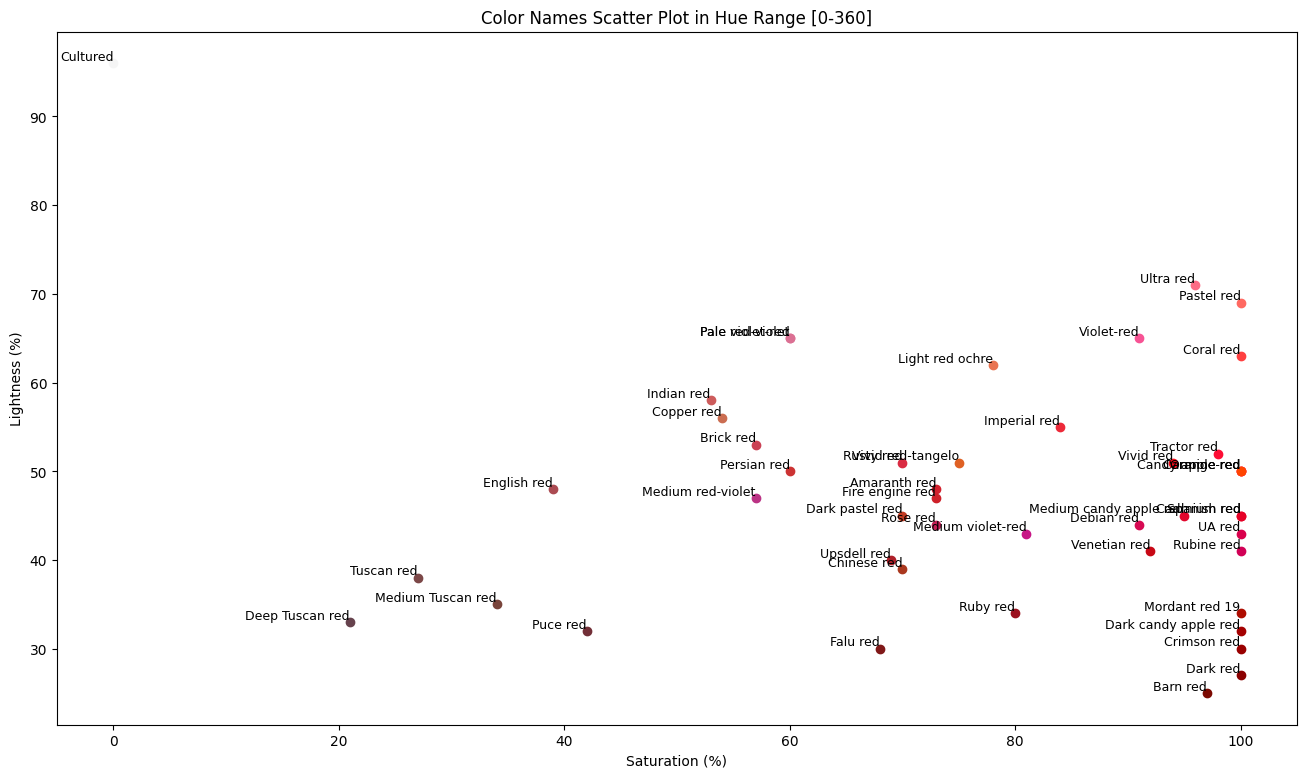

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据集
color_names_dataset = pd.read_csv('../settings/color_names.csv')

# 筛选出给定Hue范围内的数据
hue_range_min = 0
hue_range_max = 360
filtered_dataset = color_names_dataset[
    (color_names_dataset['Hue (degrees)'] >= hue_range_min) & 
    (color_names_dataset['Hue (degrees)'] <= hue_range_max) 
]
# filter name contains 'green'  
filtered_dataset = color_names_dataset[color_names_dataset['Name'].str.contains('red')]
print(filtered_dataset)
# 提取所需列
color_names = filtered_dataset['Name']
saturation = filtered_dataset['HSL.S (%)']
lightness = filtered_dataset['HSL.L (%)']
hex_colors = filtered_dataset['Hex (24 bit)']

# 设置散点图
plt.figure(figsize=(16, 9))

# 绘制散点图
for i, color_name in enumerate(color_names):
    plt.scatter(saturation.iloc[i], lightness.iloc[i], color=hex_colors.iloc[i], label=color_name)
    plt.text(saturation.iloc[i], lightness.iloc[i], color_name, fontsize=9, ha='right', va='bottom')

plt.xlabel('Saturation (%)')
plt.ylabel('Lightness (%)')
plt.title('Color Names Scatter Plot in Hue Range [{}-{}]'.format(hue_range_min, hue_range_max))
plt.show()


The color most similar to Acid green + Dark red - Red is Maximum Green Yellow
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.7023333333333334, 0.7568, 0.10319999999999996, 1] [0.8537499999999999, 0.9024999999999999, 0.3175000000000001, 1]


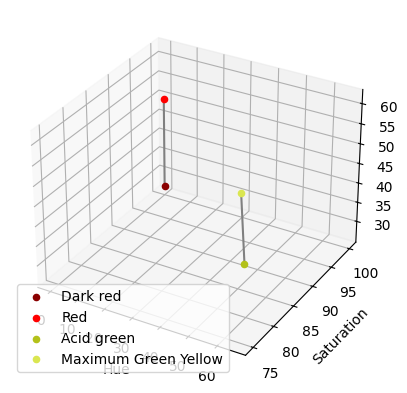

The color most similar to Android green + Dark red - Red is Medium spring bud
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.6466666666666666, 0.775, 0.22499999999999998, 1] [0.7934999999999999, 0.865, 0.5349999999999999, 1]


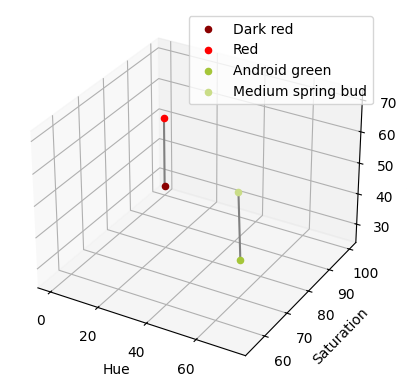

The color most similar to Apple green + Dark red - Red is Arctic lime
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.5519999999999999, 0.72, 0.0, 1] [0.8159999999999998, 1.0, 0.08000000000000007, 1]


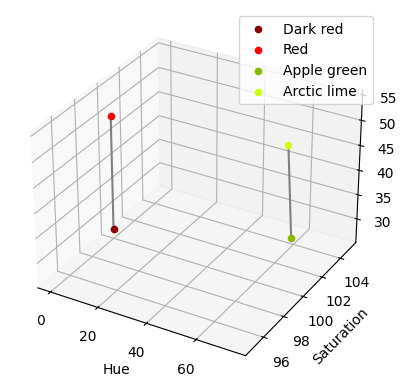

The color most similar to Army green + Dark red - Red is Middle Green Yellow
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.30083999999999994, 0.3312, 0.12880000000000003, 1] [0.6735199999999999, 0.7492, 0.37080000000000013, 1]


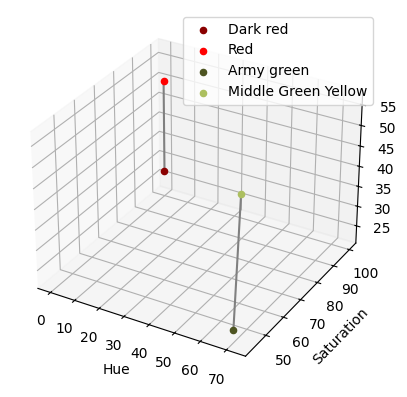

The color most similar to Bangladesh green + Dark red - Red is Caribbean green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.42, 0.308, 1] [0.0, 0.8, 0.6000000000000001, 1]


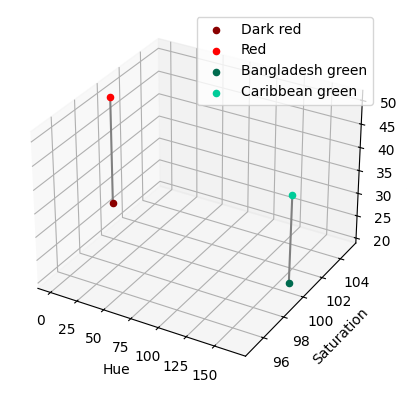

The color most similar to Blue-green + Dark red - Red is Picton blue
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.05069999999999997, 0.5935799999999999, 0.7293000000000001, 1] [0.2701999999999998, 0.6965999999999998, 0.9098000000000002, 1]


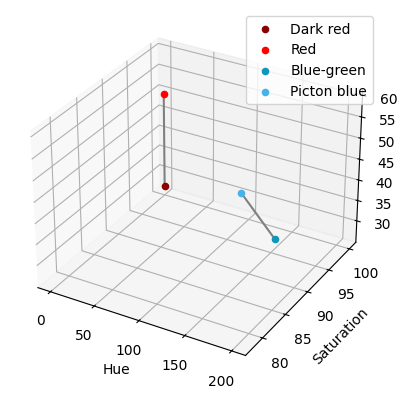

The color most similar to Bottle green + Dark red - Red is Caribbean green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.42, 0.308, 1] [0.0, 0.8, 0.6000000000000001, 1]


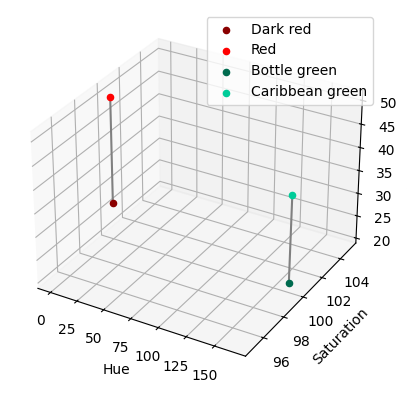

The color most similar to Bright green + Dark red - Red is French lime
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.3999999999999999, 1.0, 0.0, 1] [0.6227400000000001, 0.9921999999999999, 0.2278000000000001, 1]


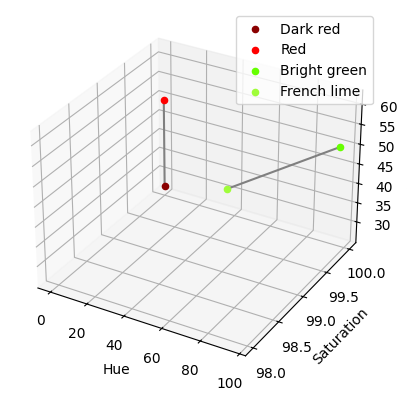

The color most similar to British racing green + Dark red - Red is GO green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.26, 0.14733333333333334, 1] [0.0, 0.68, 0.4080000000000002, 1]


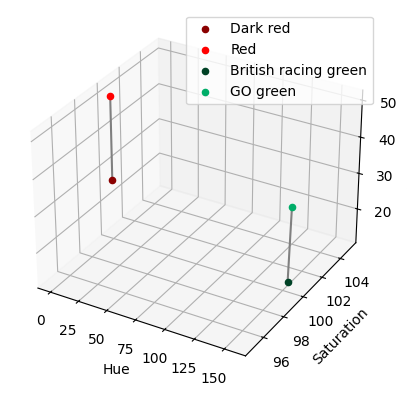

The color most similar to Brunswick green + Dark red - Red is Zomp
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.10400000000000004, 0.296, 0.23840000000000003, 1] [0.22440000000000004, 0.6556, 0.5549866666666667, 1]


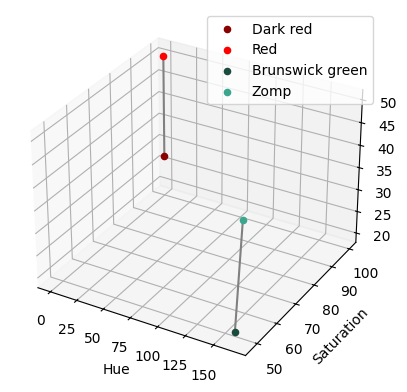

The color most similar to Bud green + Dark red - Red is Pistachio
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.48339999999999994, 0.7165, 0.38350000000000006, 1] [0.57724, 0.7738, 0.44619999999999993, 1]


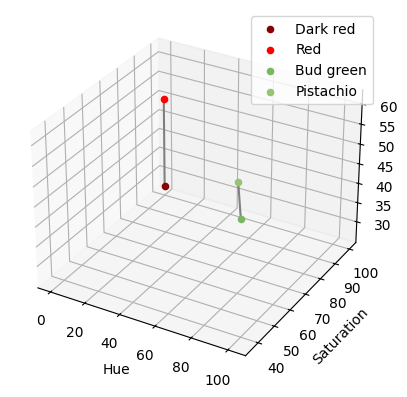

The color most similar to Cadmium green + Dark red - Red is Medium spring green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.42, 0.238, 1] [0.0, 0.98, 0.6043333333333334, 1]


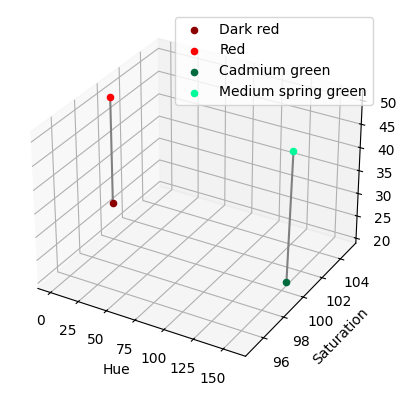

The color most similar to Cal Poly Pomona green + Dark red - Red is Medium sea green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.11759999999999998, 0.3024, 0.16996, 1] [0.235, 0.705, 0.4465, 1]


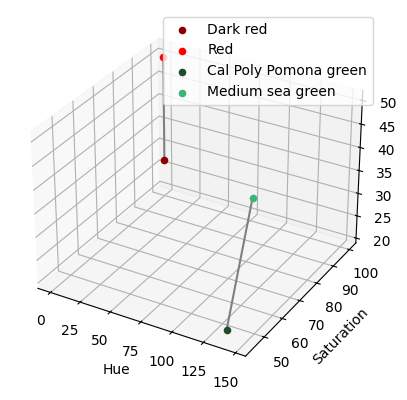

The color most similar to Camouflage green + Dark red - Red is Laurel green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.4682766666666667, 0.5217, 0.4182999999999999, 1] [0.66065, 0.7261000000000001, 0.6139, 1]


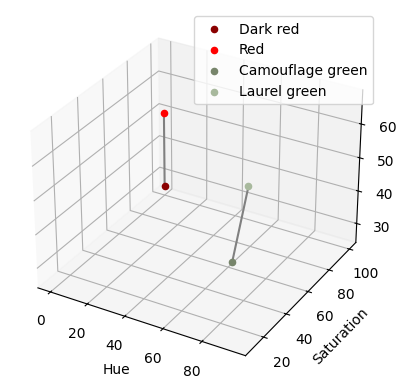

The color most similar to Caribbean green + Dark red - Red is Aquamarine
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.8, 0.6000000000000001, 1] [0.5, 1.0, 0.8333333333333333, 1]


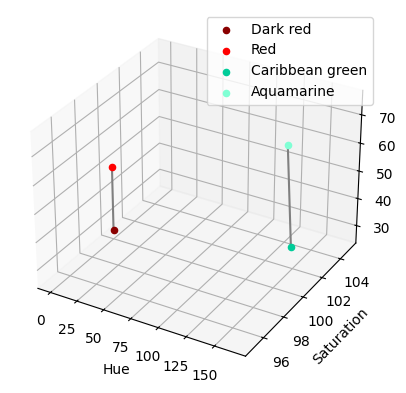

The color most similar to Castleton green + Dark red - Red is Caribbean green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.34, 0.24933333333333335, 1] [0.0, 0.8, 0.6000000000000001, 1]


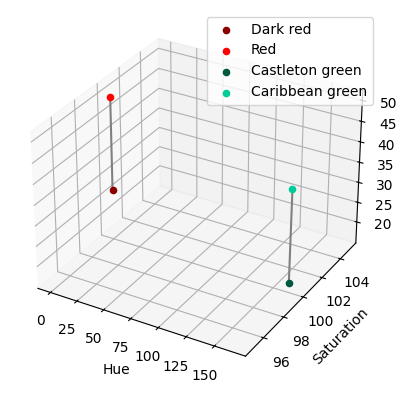

The color most similar to Celadon green + Dark red - Red is Verdigris
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.1855, 0.5145, 0.4816, 1] [0.2592, 0.7008, 0.67872, 1]


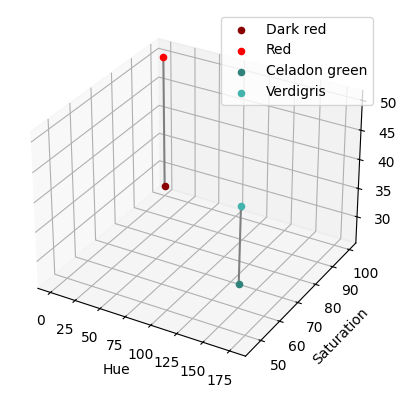

The color most similar to Charleston green + Dark red - Red is AuroMetalSaurus
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.13499999999999998, 0.165, 0.165, 1] [0.4323999999999999, 0.5038400000000001, 0.5076, 1]


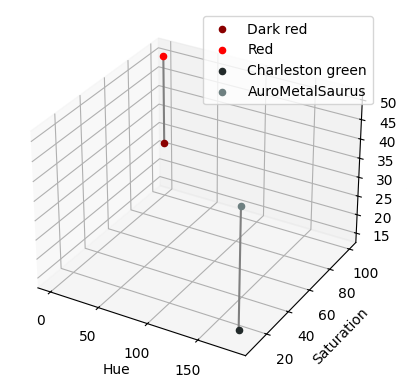

The color most similar to Chlorophyll green + Dark red - Red is Screamin' Green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.283333333333333, 1.0, 0.0, 1] [0.3999999999999999, 1.0, 0.3999999999999999, 1]


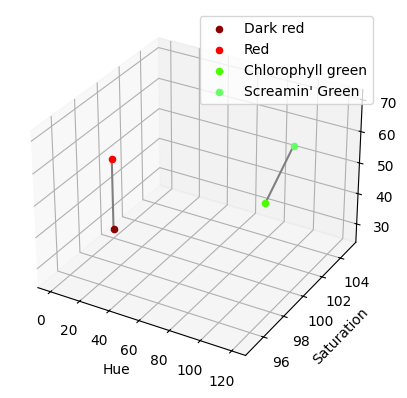

The color most similar to Dark green + Dark red - Red is Jade
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0040000000000000036, 0.196, 0.12560000000000002, 1] [0.0, 0.66, 0.4180000000000001, 1]


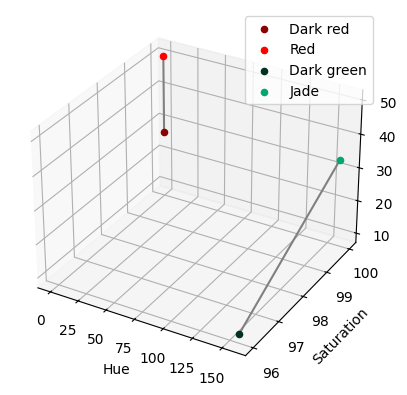

The color most similar to Dark green (X11) + Dark red - Red is Electric green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.4, 0.0, 1] [0.0, 1.0, 0.0, 1]


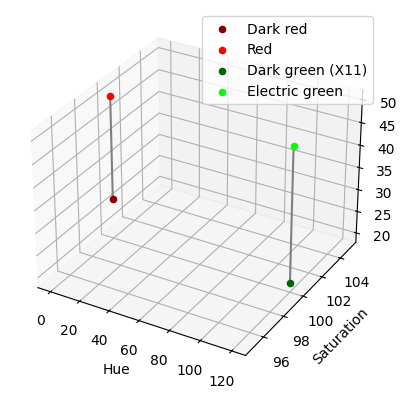

The color most similar to Dark jungle green + Dark red - Red is Hooker's green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.1008, 0.1392, 0.12768, 1] [0.28500000000000003, 0.475, 0.4211666666666667, 1]


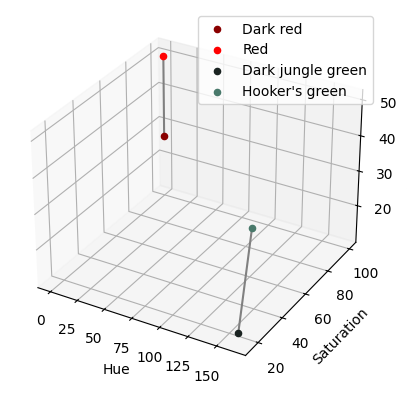

The color most similar to Dark moss green + Dark red - Red is Middle Green Yellow
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.2874999999999999, 0.3625, 0.1375, 1] [0.6735199999999999, 0.7492, 0.37080000000000013, 1]


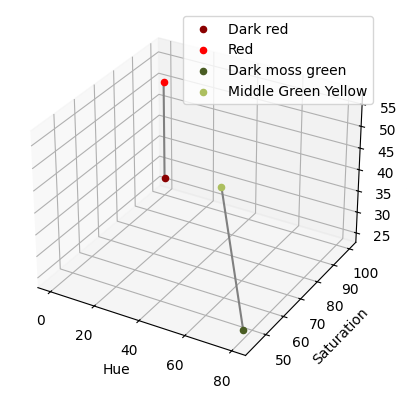

The color most similar to Dark olive green + Dark red - Red is Olivine
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.33119999999999994, 0.41700000000000004, 0.18299999999999994, 1] [0.60353, 0.7253, 0.4547, 1]


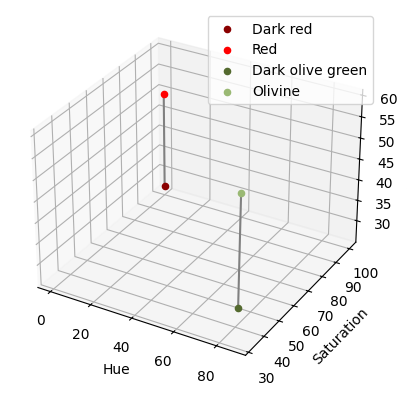

The color most similar to Dark pastel green + Dark red - Red is Guppie green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.011399999999999966, 0.7486, 0.2325600000000002, 1] [0.0, 1.0, 0.5000000000000002, 1]


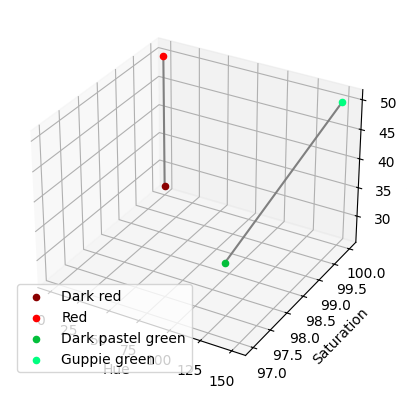

The color most similar to Dark sea green + Dark red - Red is not found
The color most similar to Dark spring green + Dark red - Red is UFO Green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.09179999999999999, 0.44820000000000004, 0.27000000000000013, 1] [0.24329999999999996, 0.8167000000000001, 0.44399000000000005, 1]


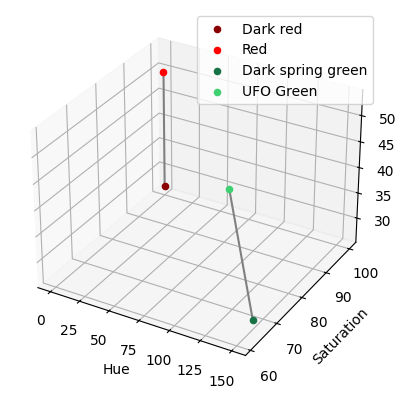

The color most similar to Dartmouth green + Dark red - Red is Guppie green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.44, 0.2346666666666667, 1] [0.0, 1.0, 0.5000000000000002, 1]


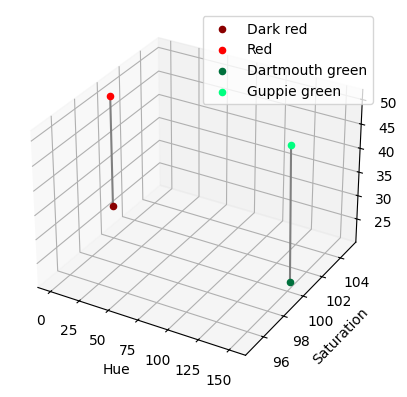

The color most similar to Deep green-cyan turquoise + Dark red - Red is Turquoise
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.05399999999999999, 0.48600000000000004, 0.37800000000000006, 1] [0.24320000000000008, 0.8768, 0.81344, 1]


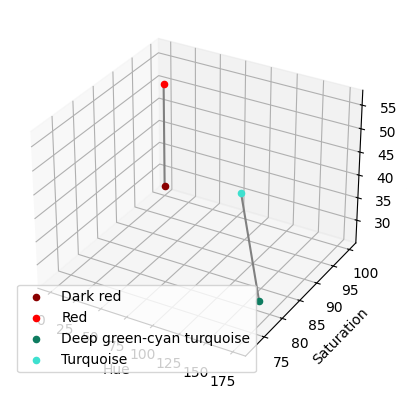

The color most similar to Deep jungle green + Dark red - Red is Robin egg blue
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.3, 0.2900000000000001, 1] [0.0, 0.7999999999999998, 0.8, 1]


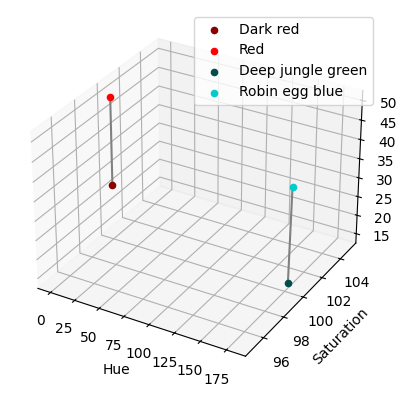

The color most similar to Deep moss green + Dark red - Red is Middle Green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.20879999999999999, 0.3712, 0.23316, 1] [0.3053, 0.5547, 0.3468666666666667, 1]


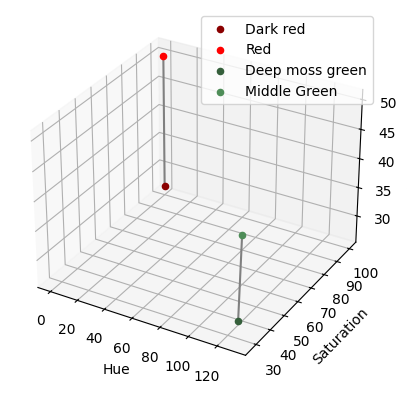

The color most similar to Electric green + Dark red - Red is Screamin' Green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 1.0, 0.0, 1] [0.3999999999999999, 1.0, 0.3999999999999999, 1]


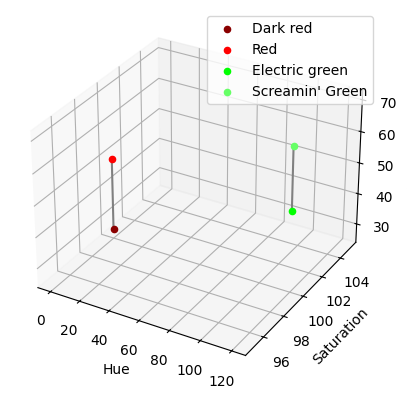

The color most similar to English green + Dark red - Red is Zomp
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.10400000000000004, 0.296, 0.23840000000000003, 1] [0.22440000000000004, 0.6556, 0.5549866666666667, 1]


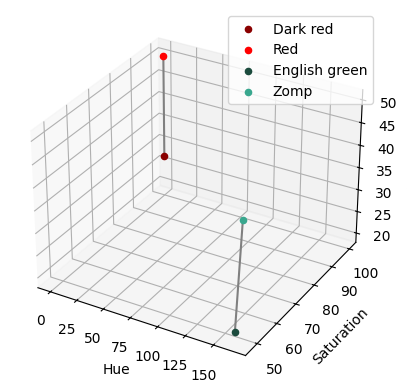

The color most similar to Fern green + Dark red - Red is Bud green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.3127733333333333, 0.4773, 0.2627, 1] [0.48339999999999994, 0.7165, 0.38350000000000006, 1]


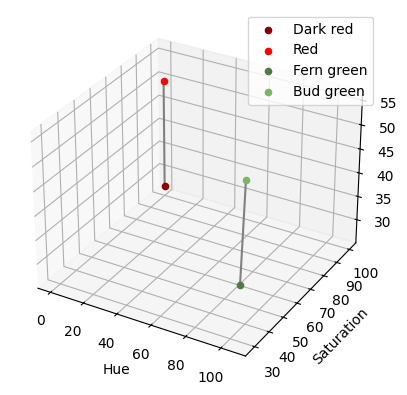

The color most similar to Forest green (traditional) + Dark red - Red is Green (pigment)
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0041999999999999815, 0.27580000000000005, 0.13547333333333333, 1] [0.0, 0.64, 0.3093333333333333, 1]


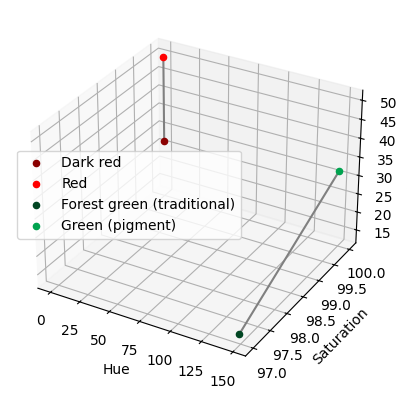

The color most similar to Forest green (web) + Dark red - Red is Lime green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.13260000000000005, 0.5474, 0.13260000000000005, 1] [0.19500000000000006, 0.8049999999999999, 0.19500000000000006, 1]


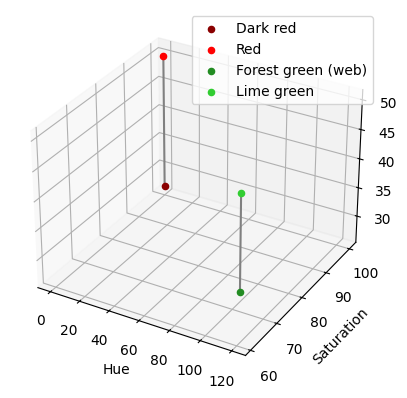

The color most similar to GO green + Dark red - Red is Medium spring green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.68, 0.4080000000000002, 1] [0.0, 0.98, 0.6043333333333334, 1]


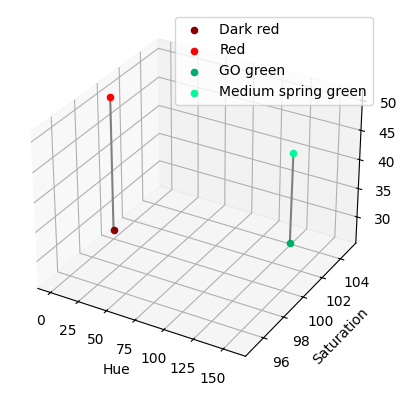

The color most similar to Green (Color Wheel) (X11 green) + Dark red - Red is Screamin' Green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 1.0, 0.0, 1] [0.3999999999999999, 1.0, 0.3999999999999999, 1]


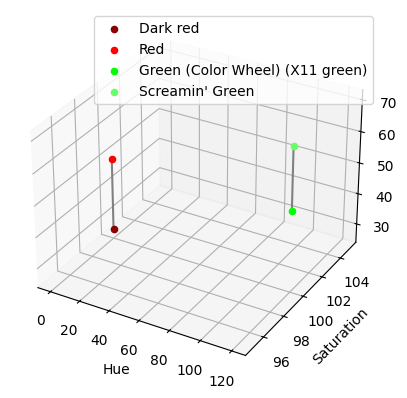

The color most similar to Guppie green + Dark red - Red is Aquamarine
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 1.0, 0.5000000000000002, 1] [0.5, 1.0, 0.8333333333333333, 1]


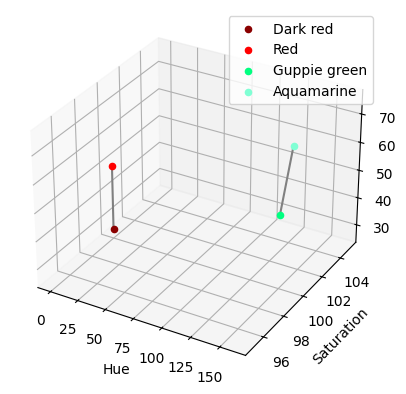

The color most similar to Harlequin green + Dark red - Red is Light green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.2722499999999999, 0.8055, 0.09450000000000003, 1] [0.5675, 0.9325, 0.5675, 1]


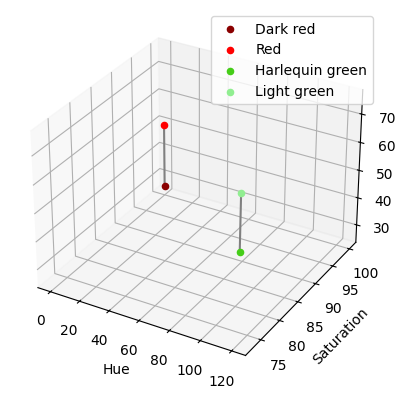

The color most similar to Hooker's green + Dark red - Red is Green Sheen
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.28500000000000003, 0.475, 0.4211666666666667, 1] [0.4368000000000001, 0.6832, 0.63392, 1]


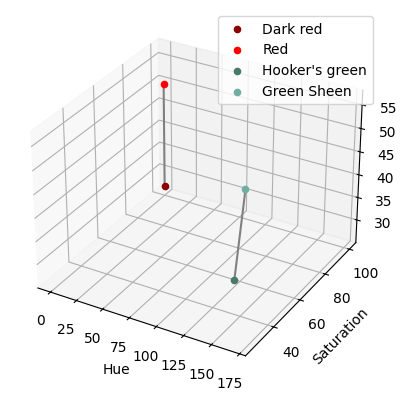

The color most similar to Hunter green + Dark red - Red is Middle Green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.20879999999999999, 0.3712, 0.23316, 1] [0.3053, 0.5547, 0.3468666666666667, 1]


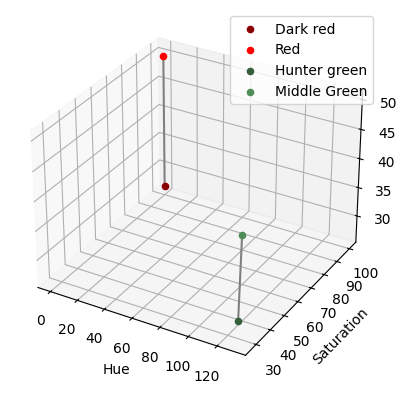

The color most similar to India green + Dark red - Red is Neon green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.07233333333333347, 0.5292000000000001, 0.03079999999999994, 1] [0.21800000000000017, 1.0, 0.08000000000000007, 1]


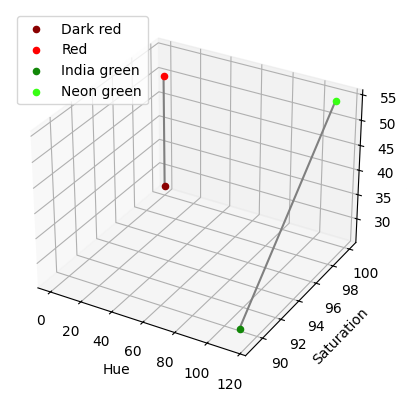

The color most similar to Islamic green + Dark red - Red is Electric green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.56, 0.0, 1] [0.0, 1.0, 0.0, 1]


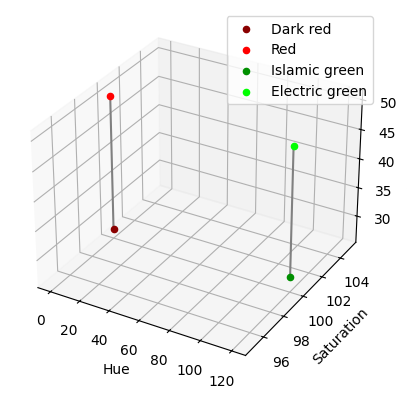

The color most similar to Jungle green + Dark red - Red is Medium aquamarine
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.16380000000000006, 0.6761999999999999, 0.53102, 1] [0.3932, 0.8668, 0.6615733333333333, 1]


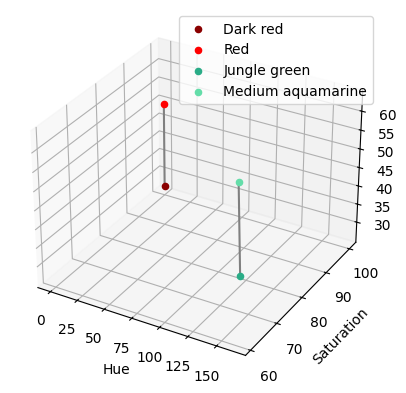

The color most similar to Kelly green + Dark red - Red is Kiwi
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.29273999999999967, 0.7298, 0.09019999999999995, 1] [0.5591066666666669, 0.8968, 0.24319999999999986, 1]


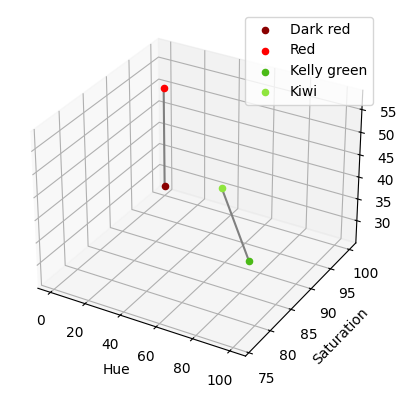

The color most similar to Kombu green + Dark red - Red is Camouflage green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.20474666666666666, 0.2552, 0.18480000000000002, 1] [0.4682766666666667, 0.5217, 0.4182999999999999, 1]


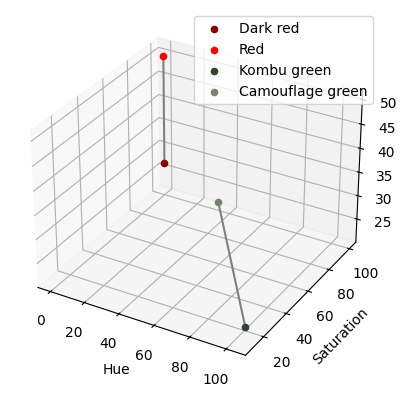

The color most similar to Laurel green + Dark red - Red is not found
The color most similar to Lawn green + Dark red - Red is French lime
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.4900000000000002, 0.98, 0.0, 1] [0.6227400000000001, 0.9921999999999999, 0.2278000000000001, 1]


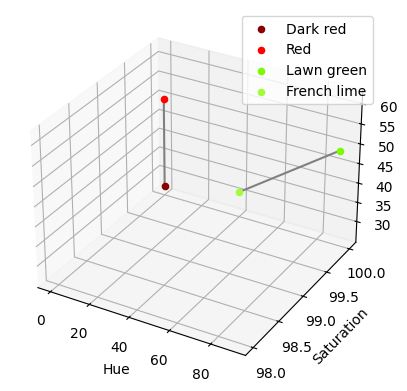

The color most similar to Light green + Dark red - Red is not found
The color most similar to Light moss green + Dark red - Red is not found
The color most similar to Light sea green + Dark red - Red is Turquoise
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.123, 0.697, 0.6682999999999999, 1] [0.24320000000000008, 0.8768, 0.81344, 1]


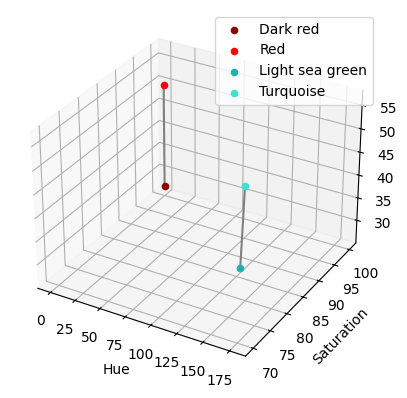

The color most similar to Lime (web) (X11 green) + Dark red - Red is Screamin' Green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 1.0, 0.0, 1] [0.3999999999999999, 1.0, 0.3999999999999999, 1]


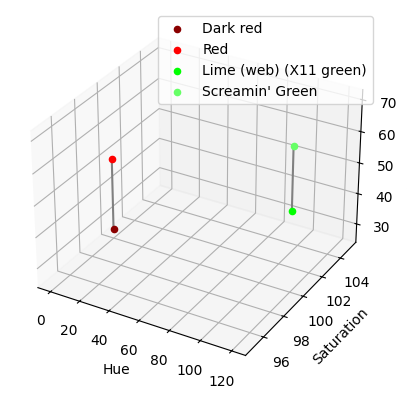

The color most similar to Lime green + Dark red - Red is Pastel green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.19500000000000006, 0.8049999999999999, 0.19500000000000006, 1] [0.4720000000000001, 0.868, 0.4720000000000001, 1]


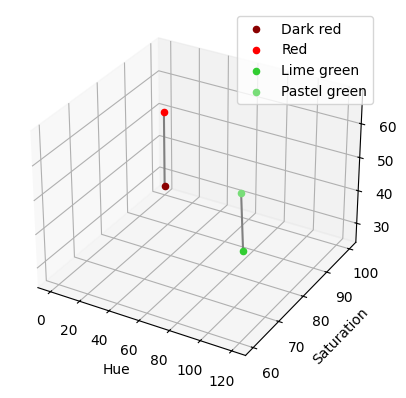

The color most similar to Lincoln green + Dark red - Red is Harlequin green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.09455999999999994, 0.3402, 0.019799999999999984, 1] [0.2722499999999999, 0.8055, 0.09450000000000003, 1]


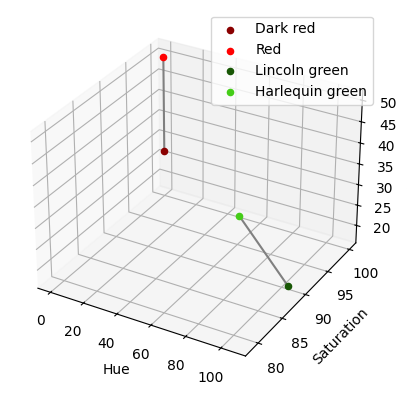

The color most similar to May green + Dark red - Red is Mantis
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.2957466666666667, 0.5658, 0.2542, 1] [0.45679999999999993, 0.7648, 0.3951999999999999, 1]


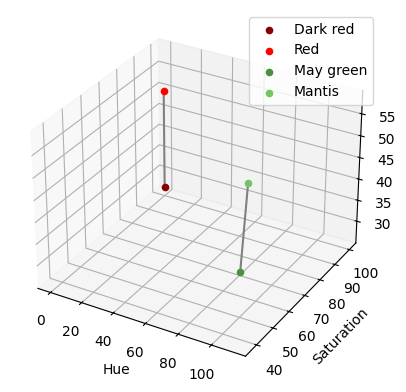

The color most similar to Medium jungle green + Dark red - Red is Deep aquamarine
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.1104, 0.2096, 0.17818666666666672, 1] [0.2508, 0.5092, 0.4273733333333334, 1]


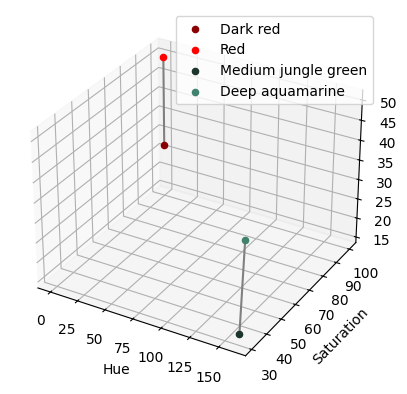

The color most similar to Medium sea green + Dark red - Red is Middle Blue Green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.235, 0.705, 0.4465, 1] [0.5499999999999999, 0.85, 0.655, 1]


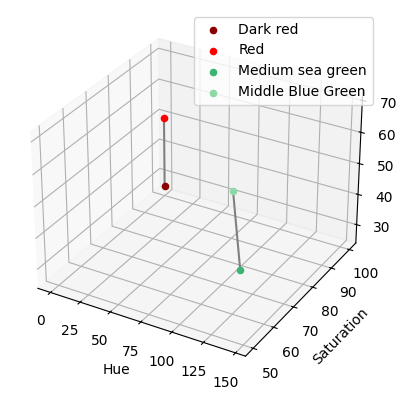

The color most similar to Medium spring green + Dark red - Red is Aquamarine
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.98, 0.6043333333333334, 1] [0.5, 1.0, 0.8333333333333333, 1]


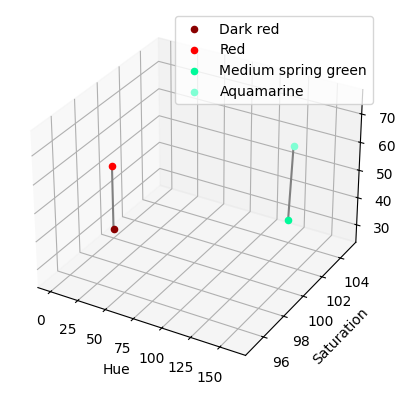

The color most similar to Midnight green (eagle green) + Dark red - Red is Bondi blue
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.2826666666666665, 0.32, 1] [0.0, 0.5879999999999997, 0.72, 1]


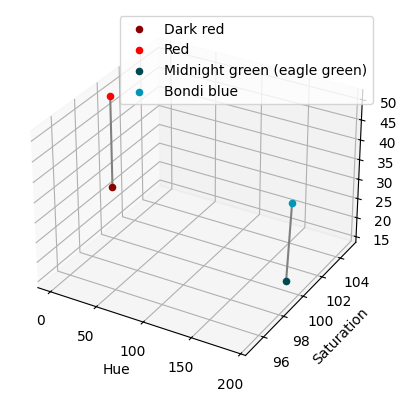

The color most similar to Mint green + Dark red - Red is Honeydew
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.6000000000000001, 1.0, 0.6000000000000001, 1] [0.94, 1.0, 0.94, 1]


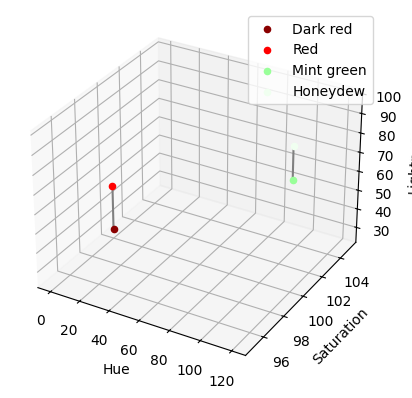

The color most similar to Moss green + Dark red - Red is Olivine
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.5424, 0.6048, 0.35519999999999996, 1] [0.60353, 0.7253, 0.4547, 1]


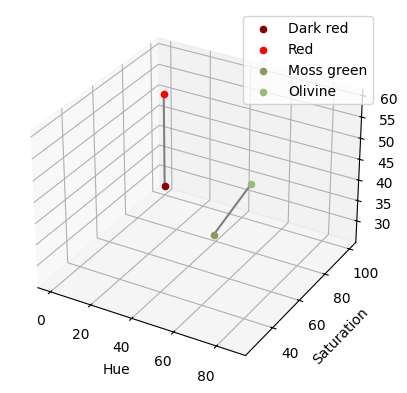

The color most similar to Mughal green + Dark red - Red is Iguana Green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.1876, 0.37240000000000006, 0.1876, 1] [0.4423999999999999, 0.7376, 0.4719199999999999, 1]


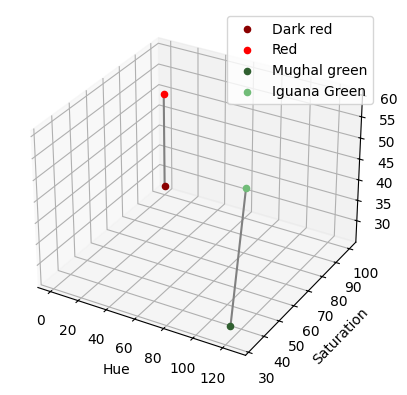

The color most similar to Myrtle green + Dark red - Red is Verdigris
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.19140000000000001, 0.4686, 0.45012, 1] [0.2592, 0.7008, 0.67872, 1]


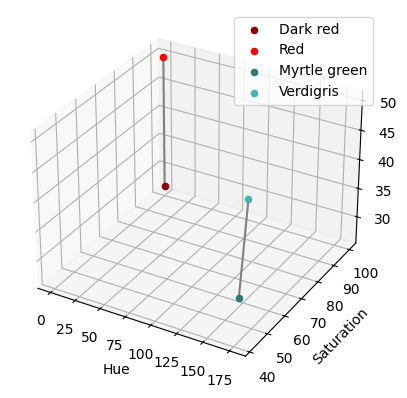

The color most similar to Napier green + Dark red - Red is Chlorophyll green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.1666666666666664, 0.5, 0.0, 1] [0.283333333333333, 1.0, 0.0, 1]


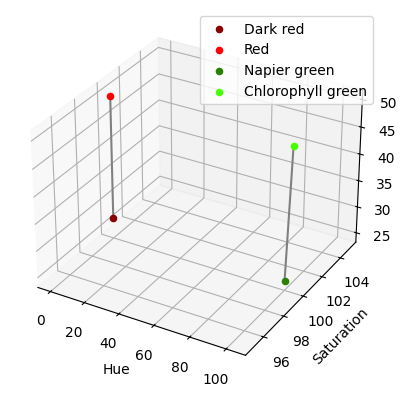

The color most similar to Neon green + Dark red - Red is Mint green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.21800000000000017, 1.0, 0.08000000000000007, 1] [0.6000000000000001, 1.0, 0.6000000000000001, 1]


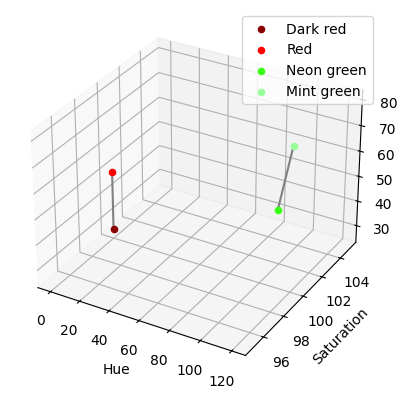

The color most similar to Office green + Dark red - Red is Electric green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.5, 0.0, 1] [0.0, 1.0, 0.0, 1]


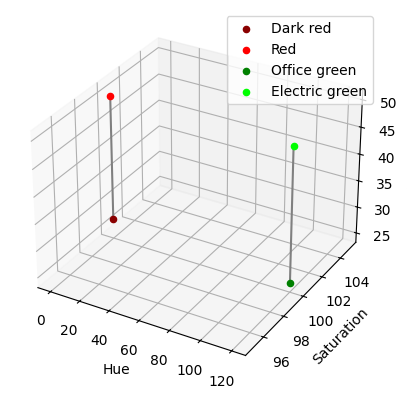

The color most similar to Old moss green + Dark red - Red is Dark khaki
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.5291, 0.49728, 0.21089999999999998, 1] [0.7396, 0.7183200000000001, 0.4203999999999999, 1]


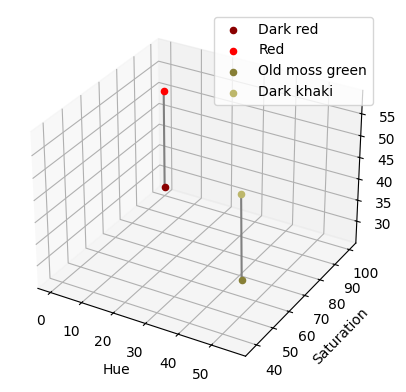

The color most similar to Pakistan green + Dark red - Red is Electric green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.4, 0.0, 1] [0.0, 1.0, 0.0, 1]


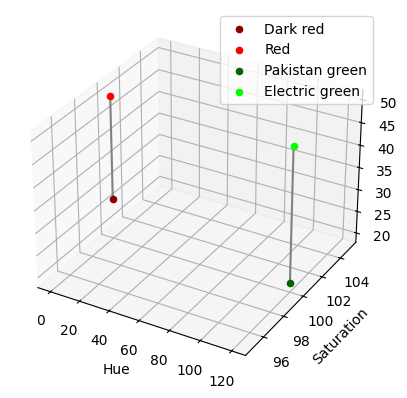

The color most similar to Pale green + Dark red - Red is Honeydew
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.5946999999999999, 0.9853000000000002, 0.5946999999999999, 1] [0.94, 1.0, 0.94, 1]


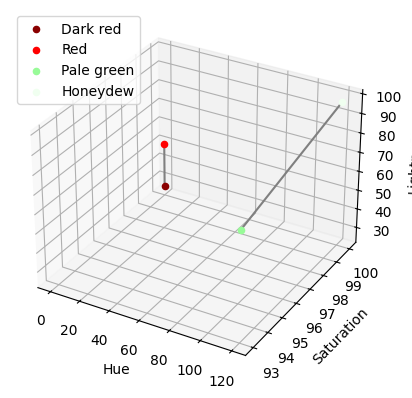

The color most similar to Paolo Veronese green + Dark red - Red is Turquoise blue
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.6, 0.4800000000000001, 1] [0.0, 1.0, 0.9333333333333333, 1]


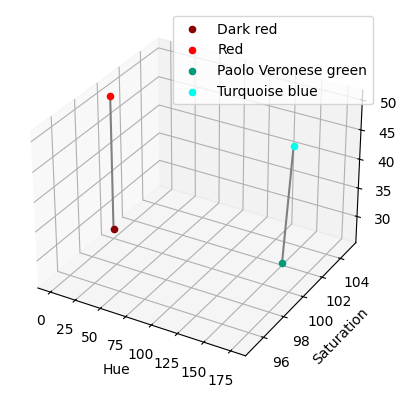

The color most similar to Pastel green + Dark red - Red is Granny Smith Apple
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.4720000000000001, 0.868, 0.4720000000000001, 1] [0.65696, 0.8944000000000001, 0.6255999999999999, 1]


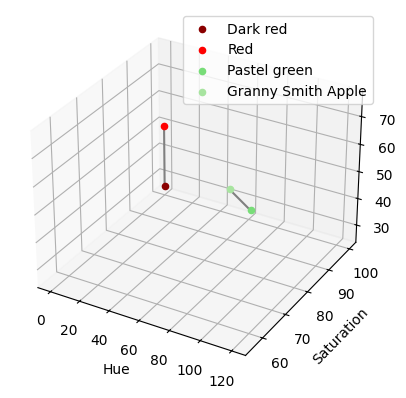

The color most similar to Persian green + Dark red - Red is Turquoise blue
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.66, 0.5830000000000002, 1] [0.0, 1.0, 0.9333333333333333, 1]


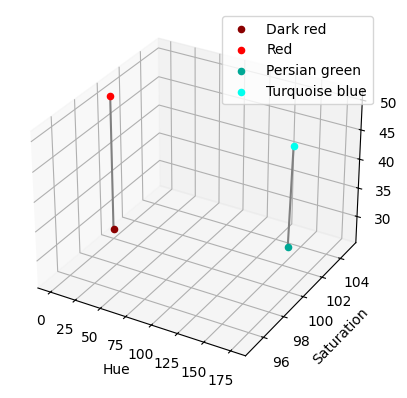

The color most similar to Phthalo green + Dark red - Red is Sea green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.07140000000000002, 0.2086, 0.1422866666666667, 1] [0.17999999999999994, 0.54, 0.336, 1]


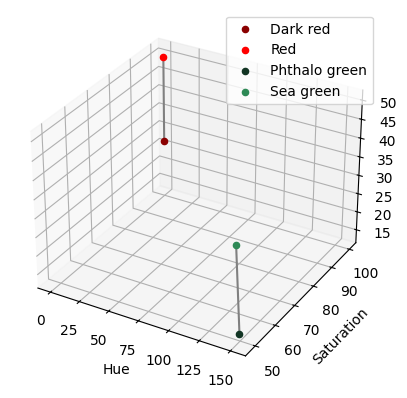

The color most similar to Pine green + Dark red - Red is Turquoise blue
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0048000000000000265, 0.47519999999999996, 0.436, 1] [0.0, 1.0, 0.9333333333333333, 1]


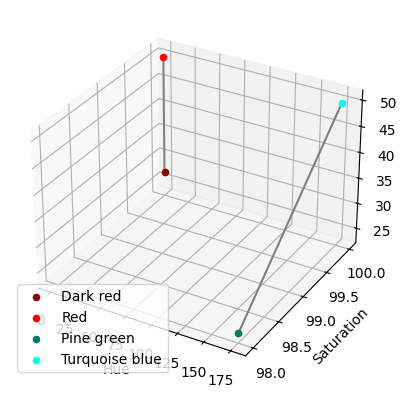

The color most similar to Rifle green + Dark red - Red is Camouflage green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.2678, 0.299, 0.22100000000000003, 1] [0.4682766666666667, 0.5217, 0.4182999999999999, 1]


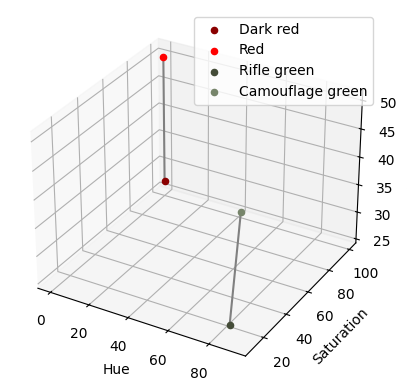

The color most similar to Russian green + Dark red - Red is Dark sea green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.40670000000000006, 0.5732999999999999, 0.40670000000000006, 1] [0.5625, 0.7375, 0.5625, 1]


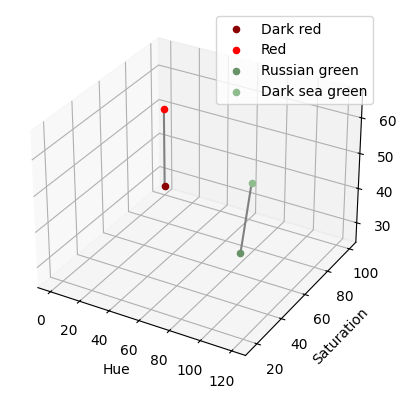

The color most similar to Sacramento State green + Dark red - Red is Caribbean green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.34, 0.24933333333333335, 1] [0.0, 0.8, 0.6000000000000001, 1]


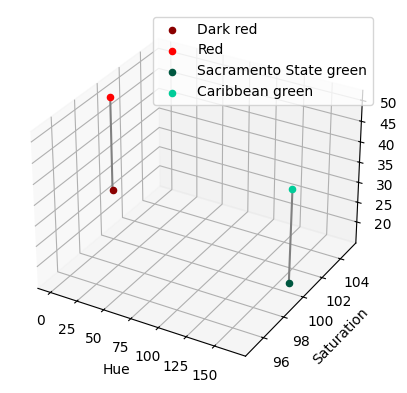

The color most similar to Sap green + Dark red - Red is Pistachio
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.31349999999999995, 0.495, 0.16500000000000004, 1] [0.57724, 0.7738, 0.44619999999999993, 1]


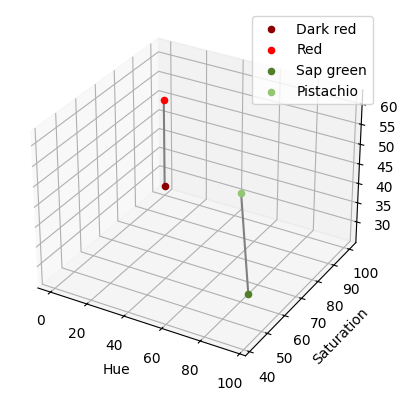

The color most similar to Sea green + Dark red - Red is Emerald
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.17999999999999994, 0.54, 0.336, 1] [0.31600000000000006, 0.784, 0.4720000000000001, 1]


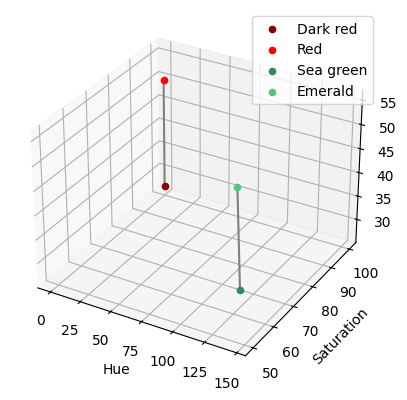

The color most similar to Shamrock green + Dark red - Red is Medium spring green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.62, 0.3720000000000001, 1] [0.0, 0.98, 0.6043333333333334, 1]


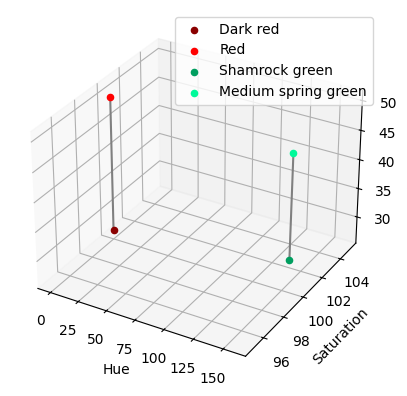

The color most similar to Spanish green + Dark red - Red is Guppie green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.56, 0.30800000000000005, 1] [0.0, 1.0, 0.5000000000000002, 1]


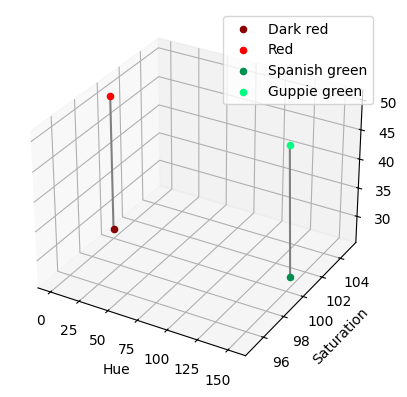

The color most similar to Spring green + Dark red - Red is Aquamarine
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 1.0, 0.5000000000000002, 1] [0.5, 1.0, 0.8333333333333333, 1]


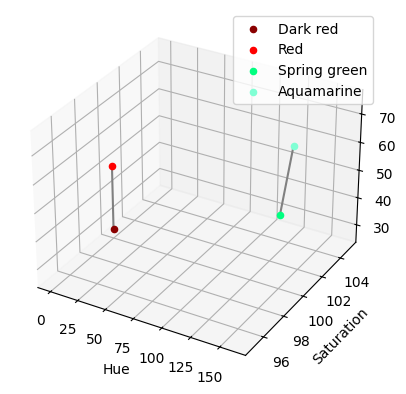

The color most similar to Tea green + Dark red - Red is not found
The color most similar to Teal green + Dark red - Red is Aqua
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.5, 0.49166666666666675, 1] [0.0, 0.9999999999999998, 1.0, 1]


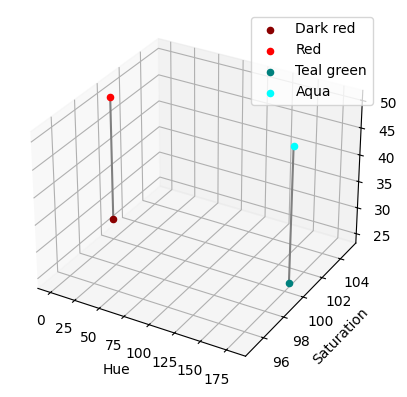

The color most similar to Turquoise green + Dark red - Red is Sea Foam Green
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.6220000000000001, 0.8379999999999999, 0.7012, 1] [0.7515999999999999, 0.8884, 0.81772, 1]


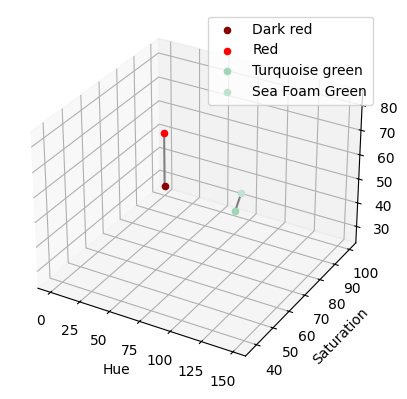

The color most similar to Turtle green + Dark red - Red is Olivine
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.5424, 0.6048, 0.35519999999999996, 1] [0.60353, 0.7253, 0.4547, 1]


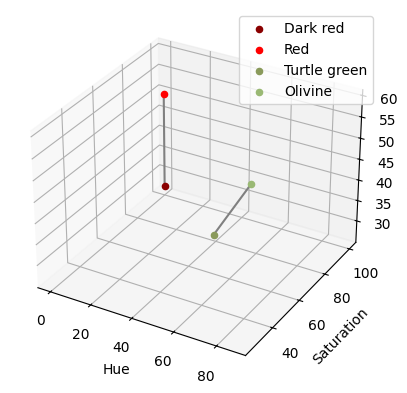

The color most similar to UP Forest green + Dark red - Red is Green (pigment)
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0041999999999999815, 0.27580000000000005, 0.13547333333333333, 1] [0.0, 0.64, 0.3093333333333333, 1]


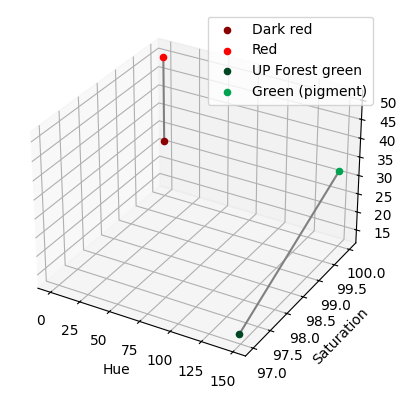

The color most similar to Very light malachite green + Dark red - Red is Teal deer
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.3875000000000002, 0.9124999999999999, 0.5187500000000002, 1] [0.5975000000000001, 0.9024999999999999, 0.6991666666666667, 1]


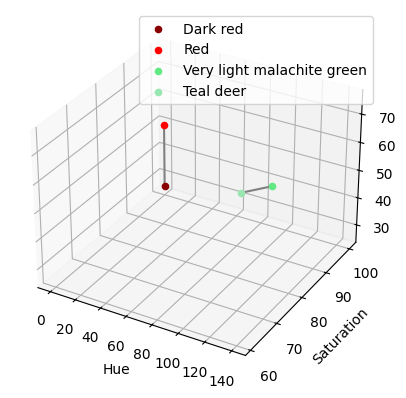

The color most similar to Viridian green + Dark red - Red is Aqua
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.0, 0.5899999999999999, 0.6, 1] [0.0, 0.9999999999999998, 1.0, 1]


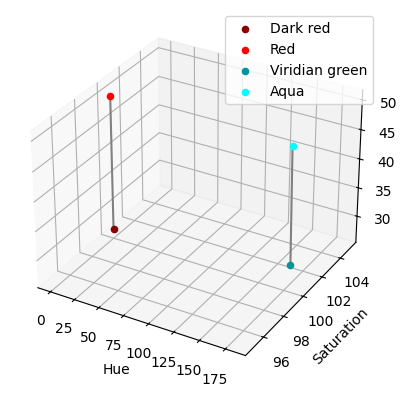

The color most similar to Vivid lime green + Dark red - Red is Mindaro
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.6582399999999999, 0.8492000000000001, 0.03079999999999994, 1] [0.8849999999999998, 0.9749999999999999, 0.5250000000000001, 1]


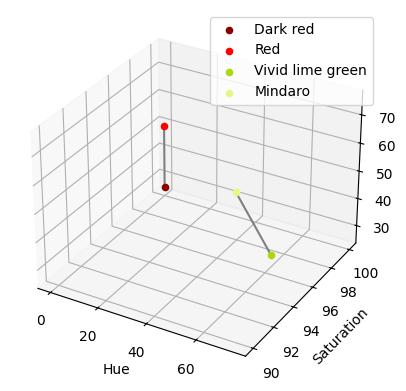

The color most similar to Wintergreen Dream + Dark red - Red is Green Sheen
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.3388, 0.5412, 0.4973466666666667, 1] [0.4368000000000001, 0.6832, 0.63392, 1]


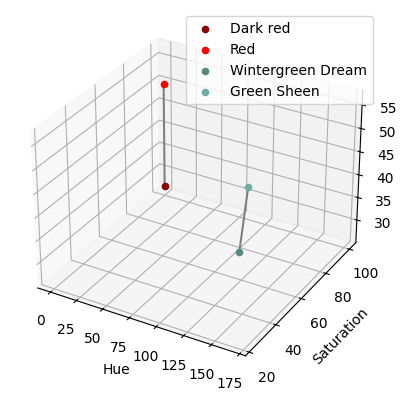

The color most similar to Yellow-green + Dark red - Red is Medium spring bud
[0.54, 0.0, 0.0, 1] [1.0, 0.0, 0.0, 1] [0.6016666666666665, 0.8049999999999999, 0.19500000000000006, 1] [0.7934999999999999, 0.865, 0.5349999999999999, 1]


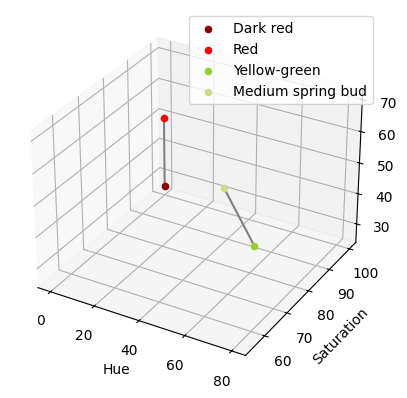

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import colorsys
# 读取颜色数据集
color_names_dataset = pd.read_csv('../settings/color_names.csv')
color_names = color_names_dataset['Name'].values

# translate color name to color vector
def name2vector(name):
    # check if color name exists
    if color_names_dataset[color_names_dataset['Name'] == name].empty:
        print('Color name {} not found'.format(name))
        return None
    c = color_names_dataset[color_names_dataset['Name'] == name].iloc[0]
    v = [c['Hue (degrees)'], c['HSL.S (%)'], c['HSL.L (%)']]
    return np.array(v)

# 计算两个颜色之间的相似度
term1 = 'Dark red'
term2 = 'Red'


v1 = name2vector(term1)
v2 = name2vector(term2)
term3_candidates = color_names_dataset[color_names_dataset['Name'].str.contains('green')]
for term3 in term3_candidates['Name']:
    v3 = name2vector(term3)


    if v1 is None or v2 is None or v3 is None:
        print('One of the color names was not found in the dataset. Exiting.')
        exit()

    closest_distance = float('inf')
    closest_name = ""

    # 找到与term3 + term1 - term2最相似的颜色
   
    for color_name in color_names:
        v_color = name2vector(color_name)
        if v_color is not None:
            # 用v的后两项算距离
            current_distance = np.linalg.norm(v_color- v3+ v1 - v2)
            if current_distance < closest_distance:
                closest_distance = current_distance
                closest_name = color_name

    if closest_distance > 20:
        print('The color most similar to {} + {} - {} is not found'.format(term3, term1, term2))
    else:
        print('The color most similar to {} + {} - {} is {}'.format(term3, term1, term2, closest_name))

        # 绘制颜色向量的3D图
        def name2rgba(name):
            c = color_names_dataset[color_names_dataset['Name'] == name].iloc[0]
            # change to color type
            h= c['Hue (degrees)'] / 360
            s = c['HSL.S (%)'] / 100
            l = c['HSL.L (%)'] / 100
            r, g, b = colorsys.hls_to_rgb(h, l, s)
            return [r, g, b, 1]

        v4 = name2vector(closest_name)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        c1 = name2rgba(term1)
        c2 = name2rgba(term2)
        c3 = name2rgba(term3)
        c4 = name2rgba(closest_name)
        print(c1, c2, c3, c4)
        # hsv color space
        ax.scatter(v1[0], v1[1], v1[2], c=[c1], marker='o', label=term1)
        ax.scatter(v2[0], v2[1], v2[2], c=[c2], marker='o', label=term2)
        ax.scatter(v3[0], v3[1], v3[2], c=[c3], marker='o', label=term3)
        ax.scatter(v4[0], v4[1], v4[2], c=[c4], marker='o', label=closest_name)
        # v1 -> v2 连线
        ax.plot([v1[0], v2[0]], [v1[1], v2[1]], [v1[2], v2[2]], c="gray")
        # v3 -> v4 连线
        ax.plot([v3[0], v4[0]], [v3[1], v4[1]], [v3[2], v4[2]], c="gray")

        ax.set_xlabel('Hue')
        ax.set_ylabel('Saturation')
        ax.set_zlabel('Lightness')
        plt.legend()
        plt.show()


In [ ]:
import os
from PIL import Image

basepath = "../../output-color/"



# 存储拼接的图像
# read the prompt frim file, return a list of prompts
def read_prompt_from_file(file_path):
    prompts = []
    with open(file_path, 'r') as f:
        for line in f:
            prompts.append(line.strip())
    return prompts
base_dir="../cases"
test_case="color_name.txt"
prompts = read_prompt_from_file(os.path.join(base_dir, test_case))
# 遍历所有的文件
for file in prompts:
    file=file.replace(" ","_")
    subpath = os.path.join(basepath, file)
    concatenated_images = []
    # 存储已经出现过的index
    seen_indices = set()
    if os.path.isdir(subpath):
        print(subpath)
        for filename in os.listdir(subpath):
            if filename == ".DS_Store":
                continue
            print(filename)
            file_index = filename.split("_")[0]
            if file_index == "concatenated":
                continue
            if "summary" in filename:  
                continue
            # 只拼接file_index第一次出现的图像
            if file_index not in seen_indices:
                print(file_index, filename)
                seen_indices.add(file_index)
                image_path = os.path.join(subpath, filename)
                image = Image.open(image_path)
                concatenated_images.append(image)
        # 拼接图像
        if concatenated_images:
            widths, heights = zip(*(image.size for image in concatenated_images))

            # 定义每行的图像数量
            images_per_row = 10

            max_width = max(widths)
            max_height = max(heights)

            # 计算新图像的总宽度和总高度
            total_width = max_width * images_per_row
            total_height = max_height * ((len(concatenated_images) + images_per_row - 1) // images_per_row)

            new_image = Image.new('RGB', (total_width, total_height))

            x_offset = 0
            y_offset = 0

            for i, image in enumerate(concatenated_images):
                new_image.paste(image, (x_offset, y_offset))
                x_offset += max_width
                
                # 如果达到每行的最大图像数量，换行
                if (i + 1) % images_per_row == 0:
                    x_offset = 0
                    y_offset += max_height

            # 保存拼接后的图像，到原来的文件夹
            # 如果存在concatenated_image.jpg，则覆盖
            if os.path.exists(os.path.join(basepath, file+"_concatenated_image.jpg")):
                os.remove(os.path.join(basepath, file+"_concatenated_image.jpg"))

            new_image.save(os.path.join(basepath, file+"_concatenated_image.jpg"))
            print("拼接后的图像已保存为 concatenated_image.jpg")
        else:
            print("没有找到任何图像进行拼接")


../../output-color/red_tomato
34_mask_red tomato.png
34 34_mask_red tomato.png
35_mask_red tomato.png
35 35_mask_red tomato.png
36_mask_red tomato.png
36 36_mask_red tomato.png
37_mask_red tomato.png
37 37_mask_red tomato.png
31_mask_red tomato.png
31 31_mask_red tomato.png
28_mask_red tomato.png
28 28_mask_red tomato.png
30_mask_red tomato.png
30 30_mask_red tomato.png
29_mask_red tomato.png
29 29_mask_red tomato.png
33_mask_red tomato.png
33 33_mask_red tomato.png
32_mask_red tomato.png
32 32_mask_red tomato.png
26_mask_red tomato.png
26 26_mask_red tomato.png
27_mask_red tomato.png
27 27_mask_red tomato.png
24_mask_red tomato.png
24 24_mask_red tomato.png
25_mask_red tomato.png
25 25_mask_red tomato.png
red_tomato_summary.png
23_mask_red tomato.png
23 23_mask_red tomato.png
22_mask_red tomato.png
22 22_mask_red tomato.png
38_mask_red tomato.png
38 38_mask_red tomato.png
21_mask_red tomato.png
21 21_mask_red tomato.png
39_mask_red tomato.png
39 39_mask_red tomato.png
20_mask_red toma

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont

basepath = "../../output-color/"

# 存储拼接的图像
# read the prompt from file, return a list of prompts
def read_prompt_from_file(file_path):
    prompts = []
    with open(file_path, 'r') as f:
        for line in f:
            prompts.append(line.strip())
    return prompts

base_dir = "../cases"
test_case = "color_name.txt"
prompts = read_prompt_from_file(os.path.join(base_dir, test_case))

# 定义字体大小
font_size = 80

# 尝试使用默认字体
try:
    font = ImageFont.truetype("../settings/arial.ttf", font_size)
except IOError:
    font = ImageFont.load_default()

concatenated_images = []
image_labels = []

for file in prompts:
    file = file.replace(" ", "_")
    subpath = os.path.join(basepath, file)
    for filename in os.listdir(subpath):
        if "summary" in filename:
            image_path = os.path.join(subpath, filename)
            image = Image.open(image_path)
            concatenated_images.append(image)

            # lable = filename.split("_")[-1]+" " +
            image_labels.append(file)

if concatenated_images:
    widths, heights = zip(*(image.size for image in concatenated_images))

    # 定义每行的图像数量
    images_per_row = 8

    max_width = max(widths)
    max_height = max(heights) + font_size + 10  # 增加字体高度和间距

    # 计算新图像的总宽度和总高度
    total_width = max_width * images_per_row
    total_height = max_height * ((len(concatenated_images) + images_per_row - 1) // images_per_row)
    
    new_image = Image.new('RGB', (total_width, total_height), (255, 255, 255))
    draw = ImageDraw.Draw(new_image)

    x_offset = 0
    y_offset = 0

    for i, image in enumerate(concatenated_images):
        # 绘制文字
        draw.text((x_offset, y_offset), image_labels[i], font=font, fill=(0, 0, 0))
        new_image.paste(image, (x_offset, y_offset + font_size + 10))

        x_offset += max_width

        # 如果达到每行的最大图像数量，换行
        if (i + 1) % images_per_row == 0:
            x_offset = 0
            y_offset += max_height

    # 保存拼接后的图像，到原来的文件夹
    concatenated_image_path = os.path.join(basepath, "0_summary_concatenated_image.jpg")
    if os.path.exists(concatenated_image_path):
        os.remove(concatenated_image_path)

    new_image.save(concatenated_image_path)
    print(f"拼接后的图像已保存为 {concatenated_image_path}")


拼接后的图像已保存为 ../../output-color/0_summary_concatenated_image.jpg


<Figure size 1600x500 with 0 Axes>

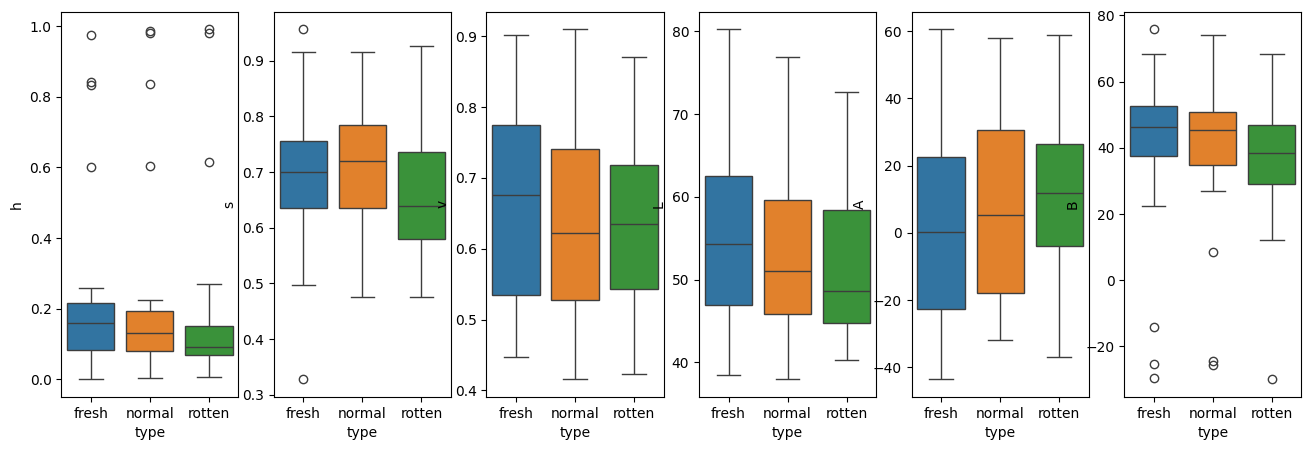

(44, 11)
(44, 11)
(44, 11)
h: FriedmanchisquareResult(statistic=5.636363636363626, pvalue=0.059714415732185576)
s: FriedmanchisquareResult(statistic=3.81818181818187, pvalue=0.14821506633751635)
v: FriedmanchisquareResult(statistic=0.7283236994219969, pvalue=0.6947787359048267)
L: FriedmanchisquareResult(statistic=6.045454545454504, pvalue=0.04866830545737156)
A: FriedmanchisquareResult(statistic=6.045454545454504, pvalue=0.04866830545737156)
B: FriedmanchisquareResult(statistic=5.31818181818187, pvalue=0.0700118399501334)
r: FriedmanchisquareResult(statistic=1.0459770114942215, pvalue=0.5927464721341064)
g: FriedmanchisquareResult(statistic=5.222857142857195, pvalue=0.07342956941435266)
b: FriedmanchisquareResult(statistic=5.31818181818187, pvalue=0.0700118399501334)


In [ ]:
import pandas as pd
import numpy as np
from skimage.color import rgb2hsv,rgb2lab
path = "../../results/test3_summary.csv"
# read csv file
summary = pd.read_csv(path)

# add hsv and lab columns
new= pd.DataFrame(columns=['h', 's', 'v', 'L', 'A', 'B', 'type', 'r', 'g', 'b', 'path'])

for index, row in summary.iterrows():
    r= row['r']
    g= row['g']
    b= row['b']
    h, s, v = rgb2hsv(np.array([r/255, g/255, b/255]).reshape(1, 1, 3))[0, 0, :]
    l, a, b = rgb2lab(np.array([r/255, g/255, b/255]).reshape(1, 1, 3))[0, 0, :]
    new.loc[index] = [h, s, v, l, a, b, row['type'], r, g, b, row['path']]
    # update the row

# group by type
grouped = summary.groupby('type')
import seaborn as sns
import matplotlib.pyplot as plt
# box plot for each type
# three subplots
plt.figure(figsize=(16, 5))
fig, axs = plt.subplots(1, 6, figsize=(16, 5))
sns.boxplot(x='type', y='h', data=new, ax=axs[0], hue = 'type') 
sns.boxplot(x='type', y='s', data=new, ax=axs[1], hue = 'type')
sns.boxplot(x='type', y='v', data=new, ax=axs[2], hue = 'type')
sns.boxplot(x='type', y='L', data=new, ax=axs[3], hue = 'type')
sns.boxplot(x='type', y='A', data=new, ax=axs[4], hue = 'type')
sns.boxplot(x='type', y='B', data=new, ax=axs[5], hue = 'type')

plt.show()
# non parametric test for 3 groups

group1 = new[new['type'] == 'normal']
group2 = new[new['type'] == 'rotten']
group3 = new[new['type'] == 'fresh']

print(group1.shape)
print(group2.shape)
print(group3.shape)

# friedman test
from scipy.stats import friedmanchisquare
print("h:",friedmanchisquare(group1['h'], group2['h'], group3['h']))
print("s:",friedmanchisquare(group1['s'], group2['s'], group3['s']))
print("v:",friedmanchisquare(group1['v'], group2['v'], group3['v']))
print("L:",friedmanchisquare(group1['L'], group2['L'], group3['L']))
print("A:",friedmanchisquare(group1['A'], group2['A'], group3['A']))
print("B:",friedmanchisquare(group1['B'], group2['B'], group3['B']))
print("r:",friedmanchisquare(group1['r'], group2['r'], group3['r']))
print("g:",friedmanchisquare(group1['g'], group2['g'], group3['g']))
print("b:",friedmanchisquare(group1['b'], group2['b'], group3['b']))

In [ ]:
import pandas as pd
import numpy as np
from skimage.color import rgb2hsv,rgb2lab
path = "../../results/test3_summary.csv"
# read csv file
summary = pd.read_csv(path)

# add hsv and lab columns
new= pd.DataFrame(columns=['h', 's', 'v', 'L', 'A', 'B', 'type', 'r', 'g', 'b', 'path'])

for index, row in summary.iterrows():
    r= row['r']
    g= row['g']
    b= row['b']
    h, s, v = rgb2hsv(np.array([r/255, g/255, b/255]).reshape(1, 1, 3))[0, 0, :]
    l, a, b = rgb2lab(np.array([r/255, g/255, b/255]).reshape(1, 1, 3))[0, 0, :]
    new.loc[index] = [h, s, v, l, a, b, row['type'], r, g, b, row['path']]
    # update the row

# group by type
grouped = summary.groupby('type')

def read_prompt_from_file(file_path):
    prompts = []
    with open(file_path, 'r') as f:
        for line in f:
            prompts.append(line.strip())
    return prompts


prompt = read_prompt_from_file("../cases/fruits.txt")
for p in prompt:
    d = new[new['path'].str.contains(p)]
    normal = d[d['type'] == 'normal']
    rotten = d[d['type'] == 'rotten']
    fresh = d[d['type'] == 'fresh']
    diff_s_nr = np.mean(normal['s']) - np.mean(rotten['s'])
    diff_s_nf = np.mean(normal['s']) - np.mean(fresh['s'])
    diff_v_nr = np.mean(normal['v']) - np.mean(rotten['v'])
    diff_v_nf = np.mean(normal['v']) - np.mean(fresh['v'])
    diff_L_nr = np.mean(normal['L']) - np.mean(rotten['L'])
    diff_L_nf = np.mean(normal['L']) - np.mean(fresh['L'])
    print(diff_s_nr, diff_s_nf, diff_v_nr, diff_v_nf, diff_L_nr, diff_L_nf)   



0.04213856610142308 -0.015221999589936086 0.019607843137254832 -0.04313725490196085 -1.1156127268201388 -2.3378309124838808
0.059066510739006484 0.009548547596400003 0.007843137254901933 -0.02941176470588236 -0.4621434209913744 -2.8766761639966134
0.039467701248781406 -0.16434912462686813 -0.11764705882352944 -0.0607843137254902 -4.169092414403245 -5.503169041801819
-0.0018866978015359415 -0.002367729047612732 -0.021568627450980427 -0.03725490196078429 3.066058792013308 -3.1910339031858967
0.008668144490111551 0.04178908092584477 0.033333333333333215 -0.03921568627450989 3.456565166832597 -2.3422770821852907
-0.022468850772526805 -0.008201067106525572 0.0019607843137255943 -0.050980392156862675 4.957558987330863 -3.9911694826394424
0.03607588819621954 0.036286573071906636 0.07450980392156858 -0.015686274509803866 6.992504116600827 -3.360864879424298
-0.005350849140199676 -0.04130763926365644 -0.015686274509803977 -0.05882352941176472 -1.1638120697469887 -5.413668737317849
0.05127704911

In [ ]:
path_result="../../results/test1_summary.csv"
path_baseline = "../settings/colorable_objects.csv"

result= pd.read_csv(path_result)

baseline = pd.read_csv(path_baseline)
# for each item in the result
for index, row in result.iterrows():
    # find the corresponding item in the baseline

   name = row['path'].split("/")[-1].split("_")[0]
   print(name)


cream
cream
olive
olive
sand
sand
flesh
flesh
plum
plum
peach
peach
periwinkle
periwinkle
rose
rose
salmon
salmon
violet
violet
eggplant
eggplant
puke
puke
skin
skin
mint
mint
fuchsia
fuchsia
aquamarine
aquamarine
khaki
khaki
mustard
mustard
teal
teal
brick
brick
sage
sage
orange
orange
terracotta
terracotta
lime
lime
indigo
indigo
wine
wine
lilac
lilac
gold
gold
goldenrod
goldenrod
chartreuse
chartreuse
coral
coral
rust
rust
azure
azure
turquoise
turquoise
lavender
lavender
cream
cream
olive
olive
sand
sand
flesh
flesh
plum
plum
peach
peach
periwinkle
periwinkle
rose
rose
violet
violet
salmon
salmon
eggplant
eggplant
skin
skin
puke
puke
fuchsia
fuchsia
mint
mint
khaki
khaki
aquamarine
aquamarine
mustard
mustard
teal
teal
brick
brick
sage
sage
orange
orange
lime
lime
terracotta
terracotta
indigo
indigo
wine
wine
lilac
lilac
goldenrod
goldenrod
gold
gold
chartreuse
chartreuse
coral
coral
rust
rust
azure
azure
turquoise
turquoise
lavender
lavender


h: F_onewayResult(statistic=0.7312253343201374, pvalue=0.4842531442888792)
s: F_onewayResult(statistic=1.9850503027784496, pvalue=0.14354733237935458)
v: F_onewayResult(statistic=5.558889725227691, pvalue=0.005346407578809718)
L: F_onewayResult(statistic=3.3772117339115635, pvalue=0.03867636070133349)
A: F_onewayResult(statistic=0.5104996144966085, pvalue=0.6019822430476345)
B: F_onewayResult(statistic=0.30476980168214696, pvalue=0.7380770006441801)
clipart
h: TtestResult(statistic=-1.1785990793242225, pvalue=0.24337060354903517, df=58.0)
s: TtestResult(statistic=-1.839914571516867, pvalue=0.07089964423146447, df=58.0)
v: TtestResult(statistic=-0.9546626583203209, pvalue=0.34371040035065126, df=58.0)
L: TtestResult(statistic=0.01130516196623916, pvalue=0.9910187750615198, df=58.0)
A: TtestResult(statistic=-0.8893636116269962, pvalue=0.37748166352352774, df=58.0)
B: TtestResult(statistic=-0.5352333257908926, pvalue=0.5945348500748715, df=58.0)
photo
h: TtestResult(statistic=-0.375588525

<Figure size 1600x500 with 0 Axes>

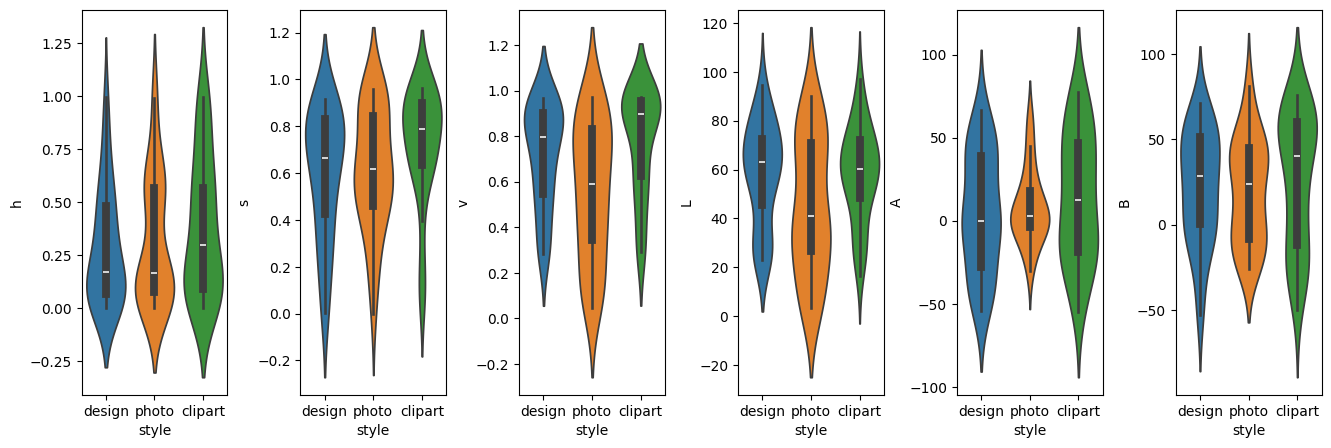

In [196]:
# compare all color usage
import pandas as pd
import numpy as np
from skimage.color import rgb2hsv,rgb2lab

path = "../../../frontend/public/all.csv"
all = pd.read_csv(path)
# print(all.keys())

# group by style
grouped = all.groupby('style')

# add hue saturation lightness 
all['h'] = 0
all['s'] = 0
all['v'] = 0
all["L"] = 0
all["A"] = 0
all["B"] = 0

# group by concept


for index, row in all.iterrows():
    dominant = row['color_dominant']
    dominant = dominant[1:-1].split(",")
    r = int(dominant[0])
    g = int(dominant[1])
    b = int(dominant[2])
    h, s, v = rgb2hsv(np.array([r/255, g/255, b/255]).reshape(1, 1, 3))[0, 0, :]
    l, a, b = rgb2lab(np.array([r/255, g/255, b/255]).reshape(1, 1, 3))[0, 0, :]
    all.loc[index, 'h'] = h
    all.loc[index, 's'] = s
    all.loc[index, 'v'] = v
    all.loc[index, 'L'] = l
    all.loc[index, 'A'] = a
    all.loc[index, 'B'] = b



# box plot for each style
import seaborn as sns
import matplotlib.pyplot as plt
# three subplots
plt.figure(figsize=(16, 5))
fig, axs = plt.subplots(1, 6, figsize=(16, 5))
# padding between subplots
plt.subplots_adjust(wspace=0.5)
# bar width = 0.8


# sns.boxplot(x='style', y='h', data=all, ax=axs[0], hue = 'style', width=0.5)
# sns.boxplot(x='style', y='s', data=all, ax=axs[1], hue = 'style', width=0.5)
# sns.boxplot(x='style', y='v', data=all, ax=axs[2], hue = 'style', width=0.5)
# sns.boxplot(x='style', y='L', data=all, ax=axs[3], hue = 'style', width=0.5)
# sns.boxplot(x='style', y='A', data=all, ax=axs[4], hue = 'style', width=0.5)
# sns.boxplot(x='style', y='B', data=all, ax=axs[5], hue = 'style', width=0.5)

# violin plot
sns.violinplot(x='style', y='h', data=all, ax=axs[0], hue = 'style', width=0.8)
sns.violinplot(x='style', y='s', data=all, ax=axs[1], hue = 'style', width=0.8)
sns.violinplot(x='style', y='v', data=all, ax=axs[2], hue = 'style', width=0.8)
sns.violinplot(x='style', y='L', data=all, ax=axs[3], hue = 'style', width=0.8)
sns.violinplot(x='style', y='A', data=all, ax=axs[4], hue = 'style', width=0.8)
sns.violinplot(x='style', y='B', data=all, ax=axs[5], hue = 'style', width=0.8)


# significance test
# anova test for three groups
from scipy.stats import f_oneway

# test for h, s, v, L, A, B, group by style (clipart, photo)
clipart = all[all['style'] == 'clipart']
photo = all[all['style'] == 'photo']
design = all[all['style'] == 'design']


# 三组数据的h, s, v, L, A, B的方差齐性检验
print("h:",f_oneway(clipart['h'], photo['h'], design['h']))
print("s:",f_oneway(clipart['s'], photo['s'], design['s'])) # have significant difference <.001
print("v:",f_oneway(clipart['v'], photo['v'], design['v']))
print("L:",f_oneway(clipart['L'], photo['L'], design['L']))
print("A:",f_oneway(clipart['A'], photo['A'], design['A']))
print("B:",f_oneway(clipart['B'], photo['B'], design['B']))

# 比较design和photo的h, s, v, L, A, B
# t-test
print("clipart")
from scipy.stats import ttest_ind
print("h:",ttest_ind(design['h'], clipart['h']))
print("s:",ttest_ind(design['s'], clipart['s']))
print("v:",ttest_ind(design['v'], clipart['v']))
print("L:",ttest_ind(design['L'], clipart['L']))
print("A:",ttest_ind(design['A'], clipart['A']))
print("B:",ttest_ind(design['B'], clipart['B']))

print('photo')

print("h:",ttest_ind(design['h'], photo['h']))
print("s:",ttest_ind(design['s'], photo['s']))
print("v:",ttest_ind(design['v'], photo['v']))
print("L:",ttest_ind(design['L'], photo['L']))
print("A:",ttest_ind(design['A'], photo['A']))
print("B:",ttest_ind(design['B'], photo['B']))




/var/folders/1v/c1lfplhx1lq8vgmwv7c0v11c0000gn/T/ipykernel_64481/1786955463.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='concept', y='delta_e', data=color_diff_df, ci=None, hue='pair', dodge=False, edgecolor='black', linewidth=1)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'lion'),
  Text(1, 0, 'mushroom'),
  Text(2, 0, 'peach'),
  Text(3, 0, 'olive'),
  Text(4, 0, 'crocodile'),
  Text(5, 0, 'mountains'),
  Text(6, 0, 'grassland'),
  Text(7, 0, 'glacier'),
  Text(8, 0, 'grape'),
  Text(9, 0, 'eggplant'),
  Text(10, 0, 'peacock'),
  Text(11, 0, 'lake'),
  Text(12, 0, 'flamingo'),
  Text(13, 0, 'tiger'),
  Text(14, 0, 'desert'),
  Text(15, 0, 'ocean'),
  Text(16, 0, 'apple'),
  Text(17, 0, 'sky'),
  Text(18, 0, 'elephant'),
  Text(19, 0, 'corn'),
  Text(20, 0, 'carrot'),
  Text(21, 0, 'fox'),
  Text(22, 0, 'blueberry'),
  Text(23, 0, 'tomato'),
  Text(24, 0, 'penguin'),
  Text(25, 0, 'banana'),
  Text(26, 0, 'tangerine'),
  Text(27, 0, 'cherry'),
  Text(28, 0, 'forest'),
  Text(29, 0, 'celery')])

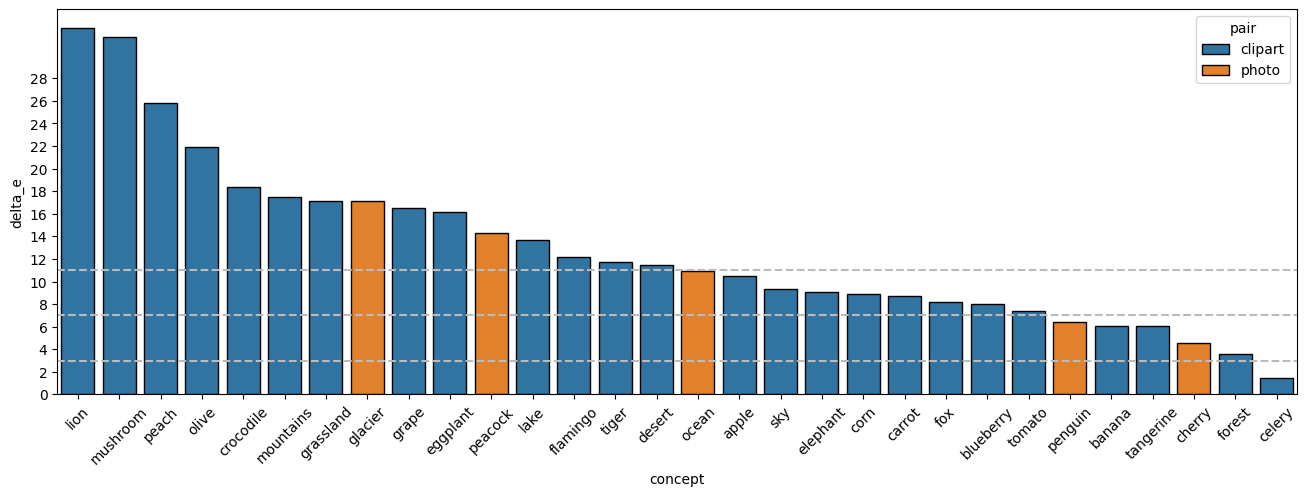

In [204]:
import pandas as pd
import numpy as np
from pyciede2000 import ciede2000
from skimage.color import rgb2lab

# Load CSV file
path = "../../../frontend/public/all.csv"
all_data = pd.read_csv(path)


# Convert color strings to numpy arrays
def parse_color_string(color_str):
    return np.array(eval(color_str))


# RGB to Lab conversion using skimage
def rgb_to_lab(color_rgb):
    normalized_rgb = color_rgb / 255.0  # Normalize RGB values to [0, 1]
    lab_color = rgb2lab(normalized_rgb.reshape(1, 1, 3)).reshape(3)  # Convert to Lab and reshape to 1D array
    return lab_color


# Group by 'concept'
grouped = all_data.groupby('concept')
color_differences = []

for concept, group in grouped:
    # Get the color_dominant column and parse it to an array
    dominant_color = [parse_color_string(color) for color in group['color_dominant']][0]
    # filter clipart
    dominant_cliaprt = group[group['style'] == 'clipart']
    dominant_photo = group[group['style'] == 'photo']
    dominant_design = group[group['style'] == 'design']
    dominant_clipart_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_cliaprt['color_dominant']]
    dominant_photo_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_photo['color_dominant']]
    dominant_design_lab = [rgb_to_lab(parse_color_string(color)) for color in dominant_design['color_dominant']]
    if len(dominant_clipart_lab) == 0 or len(dominant_photo_lab) == 0 or len(dominant_design_lab) == 0:
        print(f"Skipping concept {concept} due to missing data")
        continue

    delta_e1 = ciede2000(dominant_clipart_lab[0], dominant_design_lab[0])['delta_E_00']
    delta_e2 = ciede2000(dominant_photo_lab[0], dominant_design_lab[0])['delta_E_00']
    if delta_e1 > delta_e2:
        color_differences.append({'concept': concept, 'delta_e': delta_e2, "pair": "photo"})
    else:
        color_differences.append({'concept': concept, 'delta_e': delta_e1, "pair": "clipart"})

# Convert differences to DataFrame for easy analysis
color_diff_df = pd.DataFrame(color_differences)

# rank the color differences
color_diff_df = color_diff_df.sort_values(by='delta_e', ascending=False)

# bar plot for each concept
import seaborn as sns
import matplotlib.pyplot as plt
# add line at y=7

plt.figure(figsize=(16, 5))
# border radius 10 for the bar
sns.barplot(x='concept', y='delta_e', data=color_diff_df, ci=None, hue='pair', dodge=False, edgecolor='black', linewidth=1)
plt.axhline(y=11, color='#bbb', linestyle='--')
plt.axhline(y=7, color='#bbb', linestyle='--')
plt.axhline(y=3, color='#bbb', linestyle='--')
# y ticks
plt.yticks(np.arange(0, 30, 2))
plt.xticks(rotation=45)


In [ ]:
import os
import shutil

paths = ["represent_baseline_fruit", "represent_environments", "represent_animal", "context_environment"]
designer_data_path = "../../designer_data/source"
output_designer_path = "../../designer_data/output-designer"
participants = [2, 4, 5, 6, 8, 9, 16, 20, 25, 26]


def read_prompt_from_file(file_path):
    prompts = []
    file_path = os.path.join("../cases", file_path + ".txt")
    with open(file_path, 'r') as f:
        for line in f:
            prompts.append(line.strip())
    return prompts


for prompt_path in paths:
    p = read_prompt_from_file(prompt_path)

    # create sub folder for each prompt in base folder
    for prompt in p:
        subpath = os.path.join(output_designer_path, prompt_path + "_design", prompt)
        if not os.path.exists(subpath):
            os.makedirs(subpath)
        file_name = prompt.replace(" ", "-")
        for participant in participants:
            path = os.path.join(designer_data_path, f"P{participant}")
            # 遍历所有的文件
            for file in os.listdir(path):
                # print(file)
                # # if png file and contains the prompt
                if file.endswith(".png") and file_name == file.split("_")[2].split(".")[0]:
                    # 将文件拷贝到对应的文件夹
                    folder = os.path.join(output_designer_path, prompt_path + "_design", prompt)
                    # 删除folder下所有文件，如果不包含大些的P或者“文字文稿”
                    existing_files = os.listdir(folder)
                    # for f in existing_files:
                    # if "文字文稿" not in f:
                    #     os.remove(os.path.join(folder, f))
                    original_path = os.path.join(path, file)
                    target_path = os.path.join(folder, file)
                    # copy the file
                    shutil.copyfile(original_path, target_path)


(array([7.277e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 9.820e+02,
        1.070e+02, 1.800e+01, 1.000e+01, 8.000e+00, 3.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.690e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.500e+01, 2.000e+00, 3.000e+01,
        2.290e+02, 7.010e+02, 9.300e+0

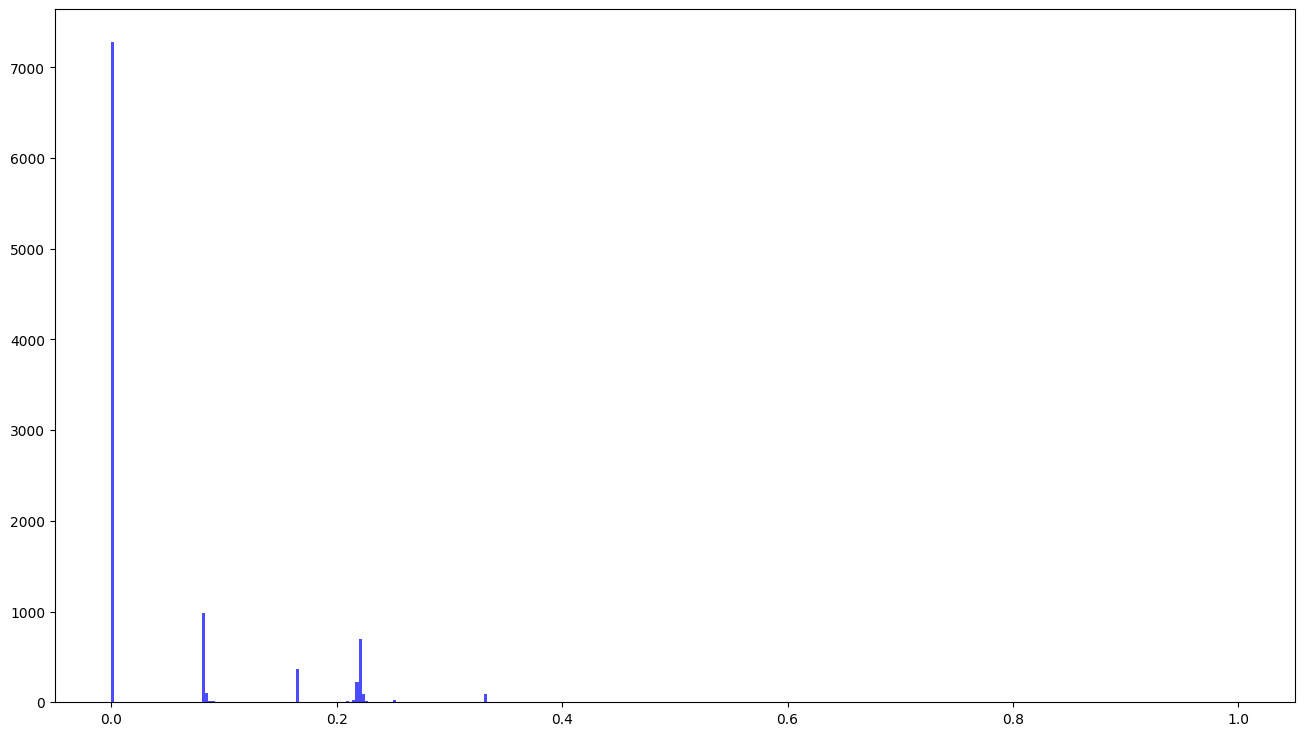

In [ ]:
from PIL import Image


path="../../output-segmented/represent_baseline_fruit_design/carrot/P2_0006_carrot.png"
image = Image.open(path)
# 下采样 100x100
image.thumbnail((100, 100))

# 如果图像有 alpha 通道
if image.mode == 'RGBA':
    # 获取图像数据
    data = image.getdata()
# 创建一个新的列表用于存储修改后的像素
    new_data = []

    for item in data:
        # 检查 alpha 通道值
        if item[3] == 0:
            # 如果 alpha 为 0，替换为黑色 (0, 0, 0, 255)
            new_data.append((0, 0, 0, 255))
        else:
                # 否则保留原有像素
            new_data.append(item)

# 替换图像数据
image.putdata(new_data)

# 将图像转换为RGB，不再有透明度
image = image.convert("RGB")
# show the image
image.show()

# for all pixel, show the hue distribution
import numpy as np
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt

# Convert the image to numpy array
image_array = np.array(image)

# Convert the RGB image to HSV
hsv_image = rgb2hsv(image_array)

# Extract the hue channel
hue_channel = hsv_image[:, :, 0]

# Flatten the hue channel
hue_channel_flat = hue_channel.flatten()

# Plot the histogram
plt.figure(figsize=(16, 9))
plt.hist(hue_channel_flat, bins=360, range=(0, 1), color='blue', alpha=0.7)